# I. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('../data/train.csv')       
data

C:\Users\Raksa Kun\AppData\Local\Temp\ipykernel_2828\542513564.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


# II. Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
data.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [5]:
data['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [6]:
data['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [7]:
data['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [8]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [9]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [10]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [11]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

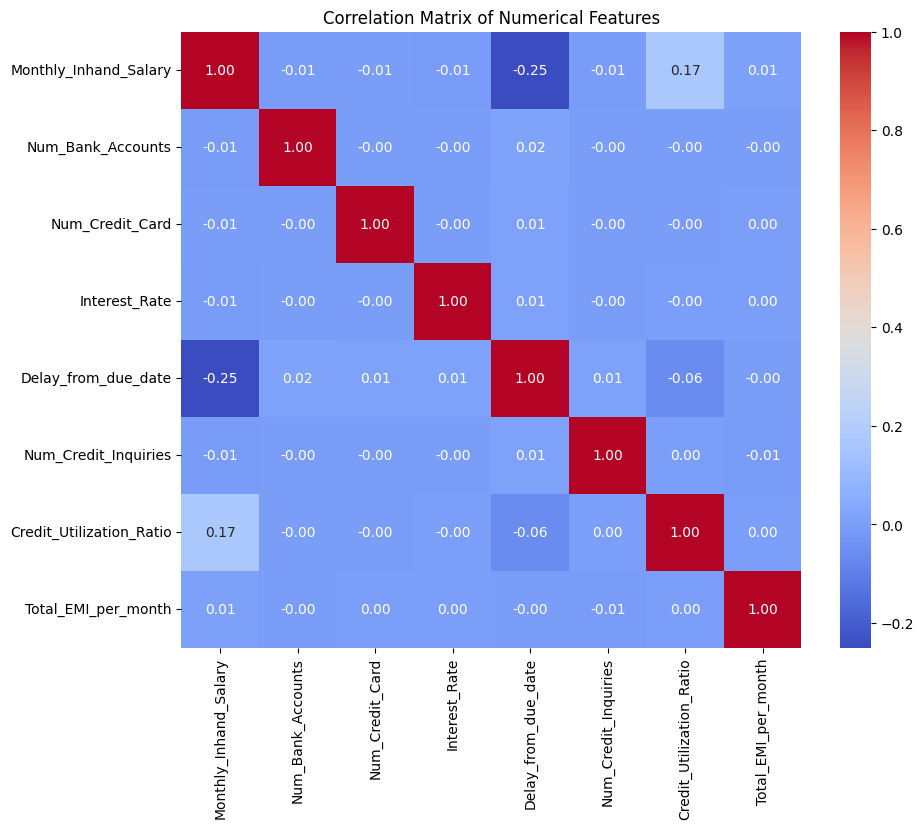

In [12]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [13]:
# Define a function to plot categorical columns distribution
def plot_category_distribution(data, column):

    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=column, palette='viridis')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add title and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [14]:
# Define a function to plot numerical columns distribution
def plot_numeric_distribution(data, column):
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, kde=True, color='skyblue')

    # Add title and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

In [15]:
# Define a function to plot oultier of numerical columns
def plot_quartile_boxplot(data, column):
    # Create the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, y=column, color='skyblue')

    # Calculate quartiles
    quartiles = np.percentile(data[column].dropna(), [25, 50, 75])

    # Draw rectangles to represent quartiles
    plt.axhspan(0, quartiles[0], facecolor='lightgreen', alpha=0.5, label='Q1')
    plt.axhspan(quartiles[0], quartiles[1], facecolor='lightblue', alpha=0.5, label='Q2')
    plt.axhspan(quartiles[1], quartiles[2], facecolor='lightcoral', alpha=0.5, label='Q3')
    plt.axhspan(quartiles[2], max(data[column]), facecolor='lightgrey', alpha=0.5, label='Q4')

    # Add quartile annotations
    for i, quartile in enumerate(quartiles):
        plt.text(0.5, quartile, f'Q{i+1}: {quartile:.2f}', color='black', ha='center', va='center')

    # Add title and labels
    plt.title(f'Box Plot with Quartile Annotations for {column}')
    plt.xlabel('')
    plt.ylabel(column)

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

# III. Data Preprocessing

## 1. Data Cleansing

In [16]:
data.rename(columns={'ID': 'id',
                     'Customer_ID': 'customer_id',
                     'Month': 'month',
                     'Name': 'name',
                     'Age': 'age',
                     'SSN': 'ssn',
                     'Occupation': 'occupation',
                     'Annual_Income': 'annual_income',
                     'Monthly_Inhand_Salary': 'monthly_inhand_salary',
                     'Num_Bank_Accounts': 'num_bank_accounts',
                     'Num_Credit_Card': 'num_credit_cards',
                     'Interest_Rate': 'interest_rate',
                     'Num_of_Loan': 'num_of_loans',
                     'Type_of_Loan': 'type_of_loan',
                     'Delay_from_due_date': 'delay_from_due_date',
                     'Num_of_Delayed_Payment': 'num_of_delayed_payment',
                     'Changed_Credit_Limit': 'changed_credit_limit',
                     'Num_Credit_Inquiries': 'num_credit_inquiries',
                     'Credit_Mix': 'credit_mix',
                     'Outstanding_Debt': 'outstanding_debt',
                     'Credit_Utilization_Ratio': 'credit_utilization_ratio',
                     'Credit_History_Age': 'credit_history_age',
                     'Payment_of_Min_Amount': 'payment_of_min_amount',
                     'Total_EMI_per_month': 'total_emi_per_month',
                     'Amount_invested_monthly': 'amount_invested_monthly',
                     'Payment_Behaviour': 'payment_behaviour',
                     'Monthly_Balance': 'monthly_balance',
                     'Credit_Score': 'credit_score'
                    }, inplace=True)
data.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [17]:
data.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_cards', 'interest_rate', 'num_of_loans', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [18]:
# Define a function to handle missing value
def handle_missing_values(df, column_name):
    # Get customer IDs that have null values
    customer_ids = df[df[column_name].isnull()]['customer_id'].unique()
    
    # Fill missing values
    for customer_id in customer_ids:
        # Get the real value by customer ID
        mode_values = df.loc[df['customer_id'] == customer_id, column_name].mode()
        
        # Check if mode_values is not empty before attempting to get the first mode
        if not mode_values.empty:
            mode_value = mode_values.iloc[0]
            
            # Replace missing value with mode value for each customer
            df.loc[(df['customer_id'] == customer_id) & (df[column_name].isna()), column_name] = mode_value
    
    return f"Missing values in column '{column_name}' handled successfully."

In [19]:
# Define a function to detect outlier using IQR method
def detect_outliers(data_series):
    # Calculate the IQR (Interquartile Range)
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]

    return outliers

# Define a function to handle outlier 
def handle_outlier_values(df, column_name, min_outlier):
    # Get customer IDs that have values greater than or equal to the minimum outlier value
    customer_ids = df[df[column_name] >= min_outlier]['customer_id'].unique()
    
    # Fill outlier values 
    for customer_id in customer_ids:
        # Get the real values by customer ID
        mode_values = df.loc[(df['customer_id'] == customer_id) & (df[column_name] < min_outlier), column_name].mode()
        
        # Check if mode_values is not empty before attempting to get the first mode
        if not mode_values.empty:
            mode_value = mode_values.iloc[0]
            
            # Replace outlier values with mode value for each customer
            df.loc[(df['customer_id'] == customer_id) & (df[column_name] >= min_outlier), column_name] = mode_value
    
    return f"Outliers in column '{column_name}' handled successfully."

### Categorical Columns

#### 1. Credit Score
- No cleaning required for this column


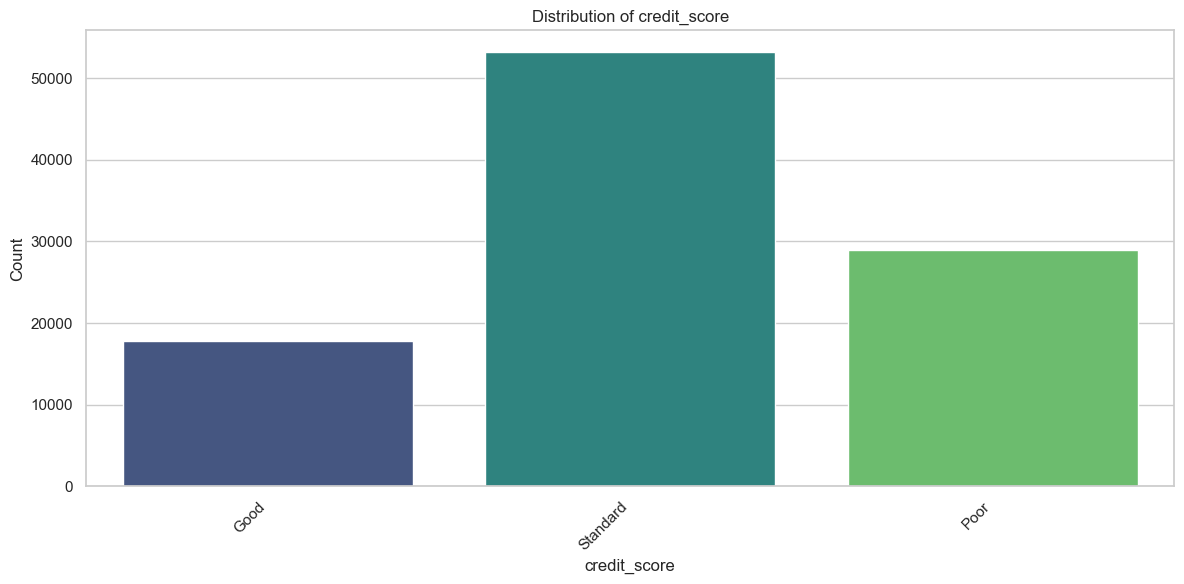

In [20]:
plot_category_distribution(data, 'credit_score')

In [21]:
data[['credit_score']].describe()

,credit_score
count,100000
unique,3
top,Standard
freq,53174


#### 2. Month
- No cleaning required for this column.

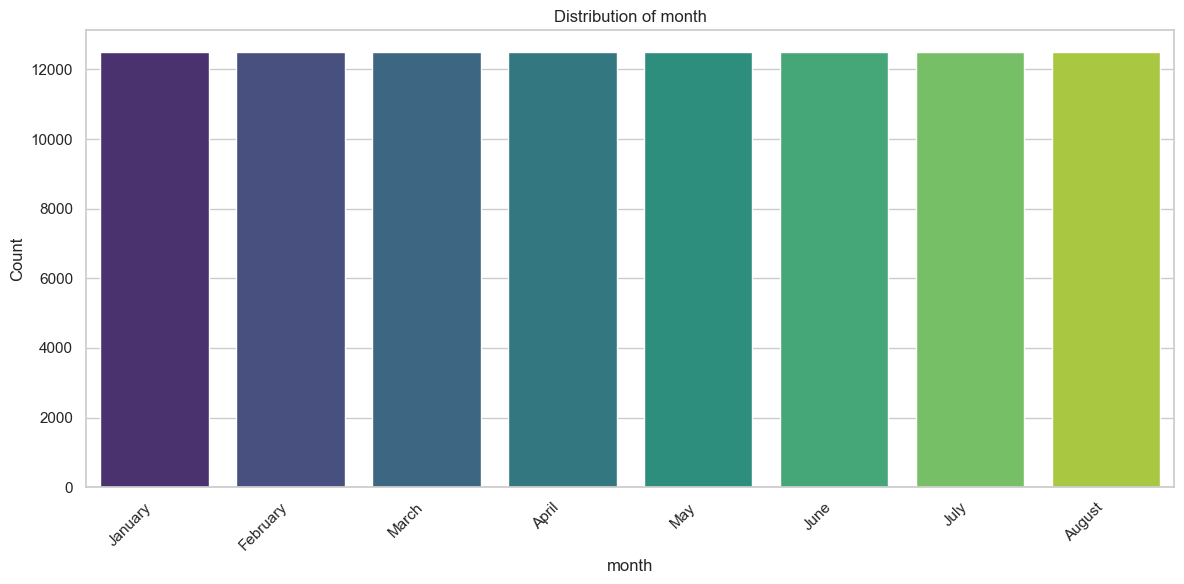

In [22]:
plot_category_distribution(data, 'month')

In [23]:
data[['month']].describe()

,month
count,100000
unique,8
top,January
freq,12500


#### 3. Name
- There are 9985 NaN values. Replace missing values with the mode value of the same customer's name by the corresponding customer_id


In [24]:
data[['name']].describe()

,name
count,90015
unique,10139
top,Langep
freq,44


In [25]:
data[data['name'].isnull()]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard
64,0x1662,CUS_0x4157,January,NaN,23,070-19-1622,Doctor,114838.41,9843.867500,2,...,Good,1377.74,33.664554,21 Years and 4 Months,No,226.892792,215.19351594560425,High_spent_Small_value_payments,802.3004421328528,Good
80,0x167a,CUS_0xa66b,January,NaN,40,221-30-8554,Teacher,33751.27,2948.605833,5,...,Standard,1328.93,37.089076,19 Years and 2 Months,NM,65.008174,117.30669710658556,High_spent_Medium_value_payments,362.54571194023237,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99964,0x25fba,CUS_0x372c,May,NaN,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good
99965,0x25fbb,CUS_0x372c,June,NaN,19,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good
99969,0x25fc3,CUS_0xf16,February,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good
99973,0x25fc7,CUS_0xf16,June,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,__10000__,Low_spent_Small_value_payments,233.301539,Good


In [26]:
data[data['customer_id'] == 'CUS_0xd40']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [27]:
# Call function to handle missing values
handle_missing_values(data,'name')

"Missing values in column 'name' handled successfully."

In [28]:
data[data['customer_id'] == 'CUS_0xd40']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [29]:
data[['name']].isnull().sum()

name    0
dtype: int64

#### 4. SSN (social security number)
- There are 5572 garbage values which iss `#F%$D@*&8`.
- Convert `#F%$D@*&8` to `np.nan` values.
- Replace missing values with the mode value of the same customer's SSN by the corresponding customer_d.
d.


In [30]:
data[data['ssn'] == '#F%$D@*&8']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
29,0x162b,CUS_0xb891,June,Jasond,55,#F%$D@*&8,_______,30689.89,2612.490833,2,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
51,0x164d,CUS_0x284a,April,Nadiaq,34,#F%$D@*&8,Lawyer,131313.4,10469.207759,0,...,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good
54,0x1650,CUS_0x284a,July,Nadiaq,34_,#F%$D@*&8,Lawyer,10909427.0,NaN,0,...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good
98,0x1694,CUS_0x3e45,March,Harriet McLeodd,35,#F%$D@*&8,Entrepreneur,54392.16_,NaN,6,...,_,179.22,31.258928,27 Years and 0 Months,NM,124.392082,33.349568589344514,High_spent_Large_value_payments,558.9263489897351,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99914,0x25f70,CUS_0x1619,March,Phil Wahbao,54,#F%$D@*&8,Media_Manager,20059.98,1523.665000,8,...,Good,909.01,29.204711,16 Years and 5 Months,No,45.076827,111.56713873012444,Low_spent_Large_value_payments,265.722534,Poor
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48_,#F%$D@*&8,Developer,22620.79,1722.065833,6,...,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor
99946,0x25fa0,CUS_0x51b3,March,Ryana,33,#F%$D@*&8,Media_Manager,59146.36,4908.863333,2,...,Good,418.03,35.750925,20 Years and 3 Months,No,26.778419,188.54469705568923,High_spent_Medium_value_payments,525.563217,Standard
99968,0x25fc2,CUS_0xf16,January,Maria Sheahanb,44,#F%$D@*&8,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.737378,Good


In [31]:
data['ssn'] = data['ssn'].replace('#F%$D@*&8',np.nan)

In [32]:
data[['ssn']].isnull().sum()

ssn    5572
dtype: int64

In [33]:
data[data['customer_id'] == 'CUS_0xd40']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [34]:
handle_missing_values(data,'ssn')

"Missing values in column 'ssn' handled successfully."

In [35]:
data[data['customer_id'] == 'CUS_0xd40']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [36]:
data[['ssn']].isnull().sum()

ssn    0
dtype: int64

#### 5. Occupation
- There are 5572 garbage values, which is `_______`.
- Convert `_______` to `np.nan` values.
- Replace missing values with the mode value of the same customer's SSN by the corresponding customer_id.

In [37]:
data[['occupation']].describe()

,occupation
count,100000
unique,16
top,_______
freq,7062


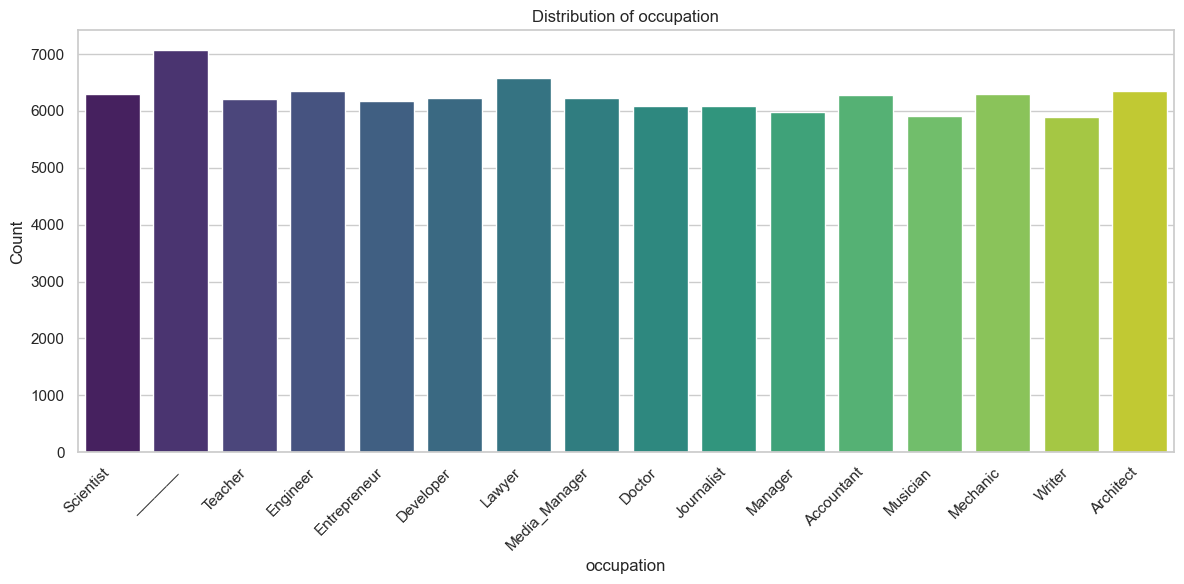

In [38]:
plot_category_distribution(data, 'occupation')

In [39]:
data['occupation'] = data['occupation'].str.replace('Media_Manager','Media Manager')

In [40]:
data[data['occupation'] == '_______']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
29,0x162b,CUS_0xb891,June,Jasond,55,072-31-6145,_______,30689.89,2612.490833,2,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,0x25f7a,CUS_0x2654,January,enj,37,647-67-8889,_______,139664.96,11777.746667,3,...,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.78234595777644,High_spent_Large_value_payments,711.261305,Standard
99935,0x25f8d,CUS_0xb11c,August,Yinka Adegokej,38,546-94-4789,_______,15319.65,1460.637500,6,...,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.87777851803025,Low_spent_Small_value_payments,216.003938,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,-500,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99943,0x25f99,CUS_0xad4f,August,Sabina Zawadzkig,48,226-45-0652,_______,22620.79,NaN,6,...,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.21728040016708,Low_spent_Small_value_payments,256.989303,Poor


In [41]:
data['occupation'] = data['occupation'].replace('_______',np.nan)

In [42]:
data[['occupation']].isnull().sum()

occupation    7062
dtype: int64

In [43]:
data[data['customer_id'] == 'CUS_0x21b1']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,NaN,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.30622796053305,Low_spent_Medium_value_payments,465.6762241330048,Good
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
14,0x1614,CUS_0x21b1,July,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,...,Good,605.03,31.131702,27 Years and 1 Months,NM,18.816215,70.10177420755677,High_spent_Medium_value_payments,464.8806778859809,Good
15,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good


In [44]:
handle_missing_values(data,'occupation')

"Missing values in column 'occupation' handled successfully."

In [45]:
data[data['customer_id'] == 'CUS_0x21b1']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.30622796053305,Low_spent_Medium_value_payments,465.6762241330048,Good
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
14,0x1614,CUS_0x21b1,July,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,...,Good,605.03,31.131702,27 Years and 1 Months,NM,18.816215,70.10177420755677,High_spent_Medium_value_payments,464.8806778859809,Good
15,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good


In [46]:
data[['occupation']].isnull().sum()

occupation    0
dtype: int64

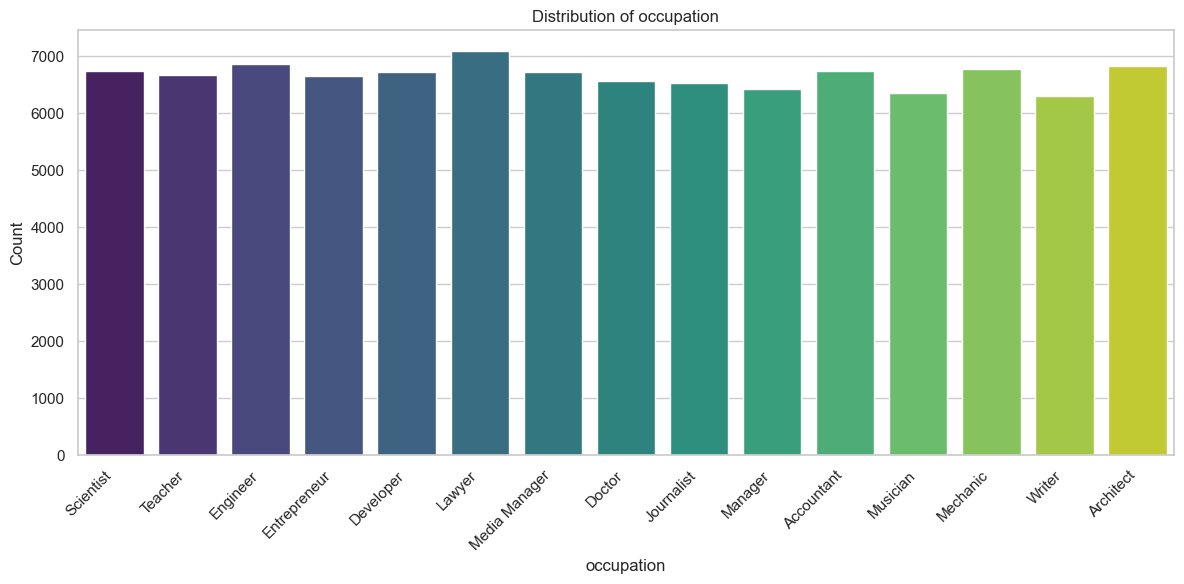

In [47]:
plot_category_distribution(data, 'occupation')

#### 6. Type of Loan
- There are 11408 of `np.nan` values.
- Replace np.nan with `[Not Specified]`.
- Replace `','` and `'and'` with `'/'`.


In [48]:
data[['type_of_loan']].describe()

,type_of_loan
count,88592
unique,6260
top,Not Specified
freq,1408


In [49]:
data[['type_of_loan']].isnull().sum()

type_of_loan    11408
dtype: int64

In [50]:
data['type_of_loan'].replace([np.NaN], 'Not Specified', inplace=True)

In [51]:
# Check number of missing values
data[['type_of_loan']].isnull().sum()

type_of_loan    0
dtype: int64

In [52]:
data[['type_of_loan']].head(5)

,type_of_loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."


In [53]:
data['type_of_loan'] = data['type_of_loan'].str.replace('and','')

In [54]:
data['type_of_loan'] = data['type_of_loan'].str.replace(',','/')

In [55]:
data[['type_of_loan']].head(5)

,type_of_loan
0,Auto Loan/ Credit-Builder Loan/ Personal Loan/...
1,Auto Loan/ Credit-Builder Loan/ Personal Loan/...
2,Auto Loan/ Credit-Builder Loan/ Personal Loan/...
3,Auto Loan/ Credit-Builder Loan/ Personal Loan/...
4,Auto Loan/ Credit-Builder Loan/ Personal Loan/...


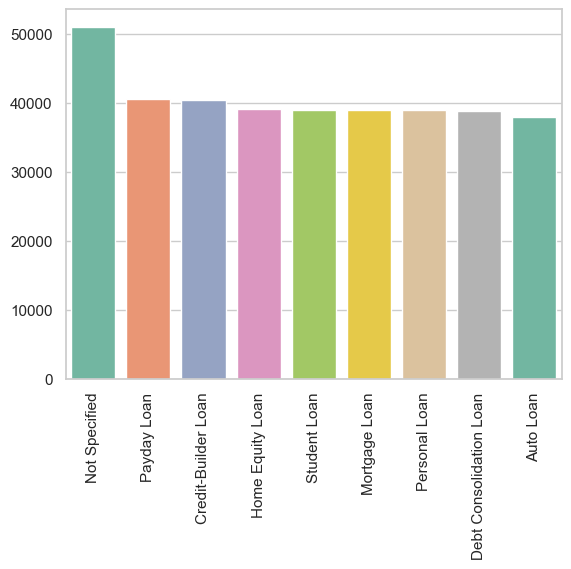

In [56]:
# Create an empty list to store the split values
loan_types = []

# Split the values in the 'Type_of_Loan' column and insert into the list
for value in data['type_of_loan']:
    loan_types.extend(value.split('/'))

# Strip leading/trailing white spaces from each loan type
loan_types = [loan_type.strip() for loan_type in loan_types]

# Calculate the value counts and sort them in descending order
loan_type_counts = pd.Series(loan_types).value_counts().sort_values(ascending=False)

# Plot the distribution
sns.barplot(x=loan_type_counts.index, y=loan_type_counts, palette='Set2')
plt.xticks(rotation=90)
plt.show()

#### 7. Credit Mix
- There are 20195 garbage values, which is `_`.
- Convert `_` to `np.nan` values.
- Replace missing values with `'Not Specified'`.


In [57]:
data[['credit_mix']].describe()

,credit_mix
count,100000
unique,4
top,Standard
freq,36479


In [58]:
data[data['credit_mix'] == '_']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,_,1303.01,39.501648,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good
29,0x162b,CUS_0xb891,June,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,_,943.86,28.924954,30 Years and 11 Months,Yes,0.000000,96.78548508587444,High_spent_Medium_value_payments,438.5454315807922,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,0x25fde,CUS_0x8600,May,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,_,3571.7,28.508250,6 Years and 0 Months,Yes,60.964772,213.97800979403817,Low_spent_Small_value_payments,208.047884,Standard
99992,0x25fe6,CUS_0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.1964806036356,Low_spent_Small_value_payments,189.64108,Poor
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor


In [59]:
data['credit_mix'] = data['credit_mix'].str.replace('_','Not Specified')

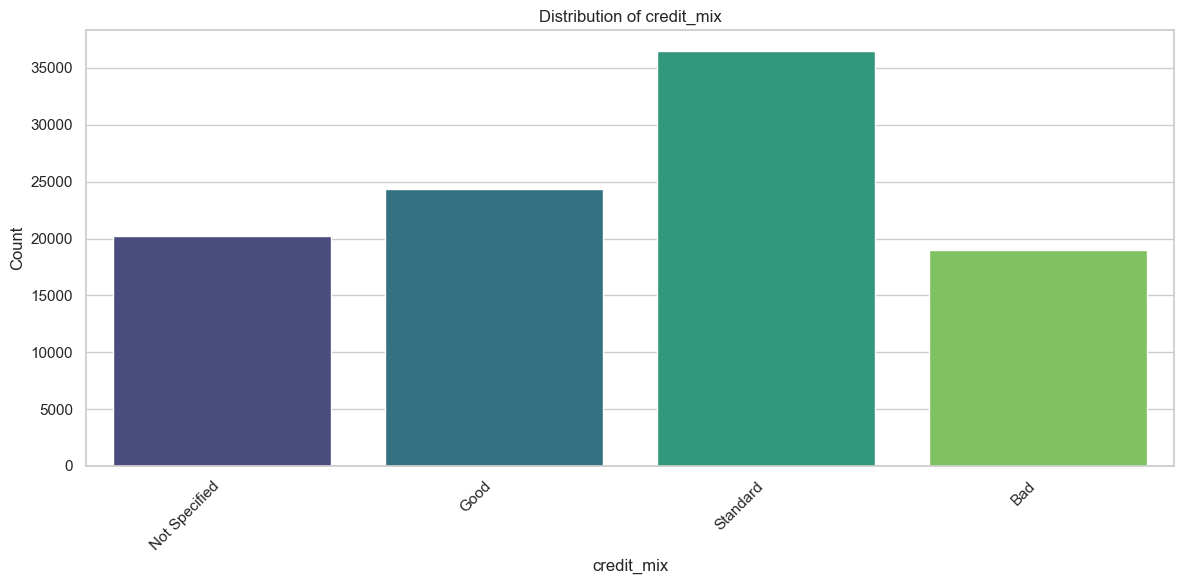

In [60]:
plot_category_distribution(data, 'credit_mix')

#### 8. Payment of Minimum Amount
- No cleaning required for this column.

In [61]:
data[['payment_of_min_amount']].describe()

,payment_of_min_amount
count,100000
unique,3
top,Yes
freq,52326


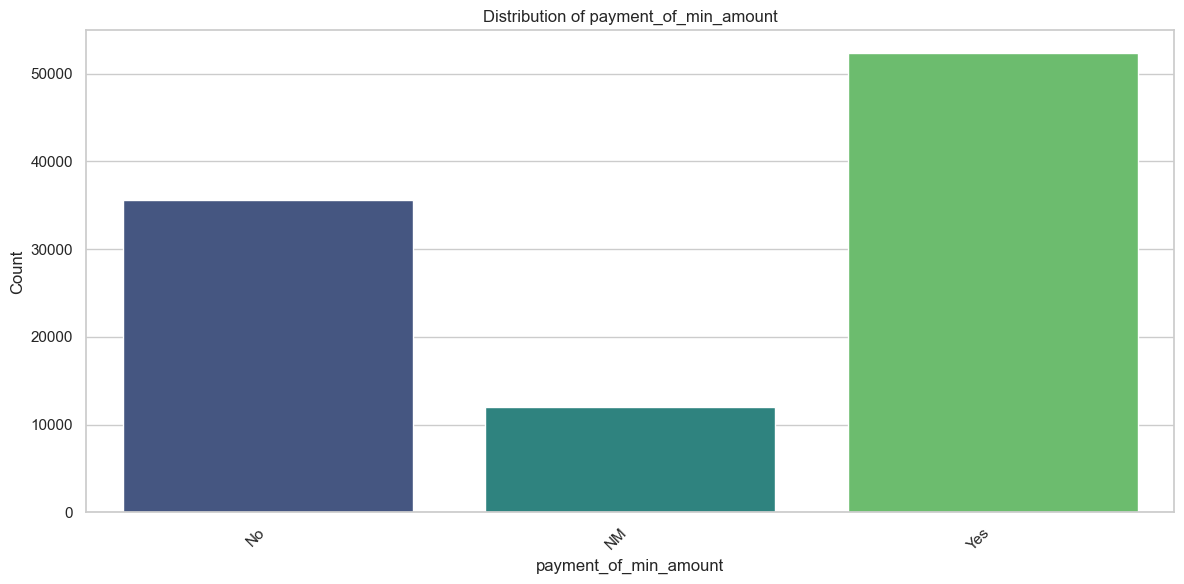

In [62]:
plot_category_distribution(data, 'payment_of_min_amount')

In [63]:
data['payment_of_min_amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

#### 9. Payment Behaviour
- There are 7600 garbage values, which is `!@9#%8`.
- Convert `!@9#%8` to `np.nan` values.
- Replace missing values with the mode value of the same customer's payment behaviour by the corresponding customer_id.

In [64]:
data[['payment_behaviour']].describe()

,payment_behaviour
count,100000
unique,7
top,Low_spent_Small_value_payments
freq,25513


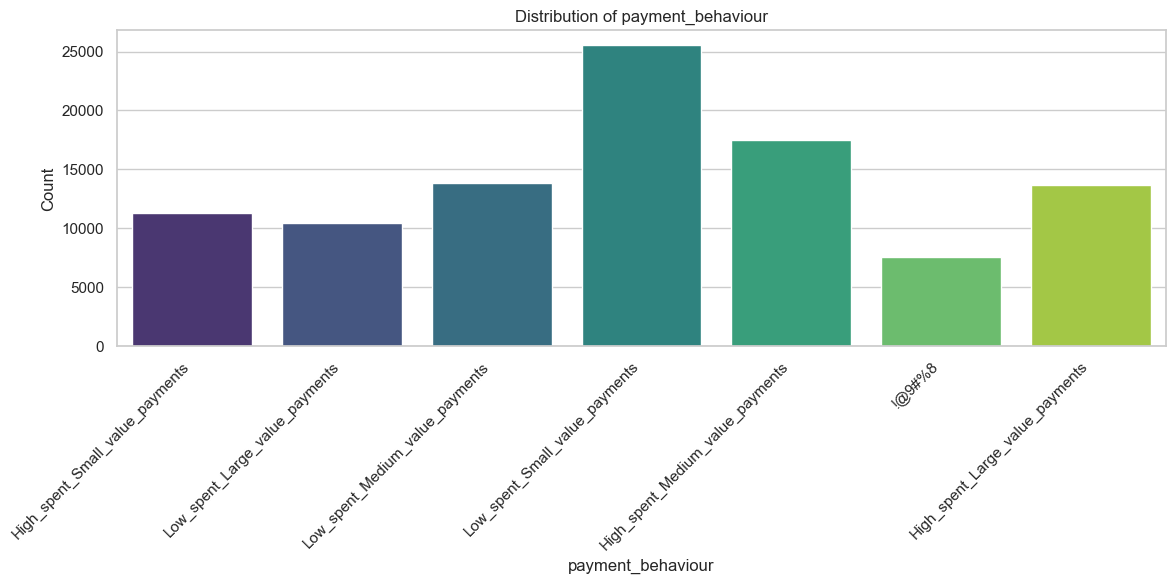

In [65]:
plot_category_distribution(data, 'payment_behaviour')

In [66]:
data[data['payment_behaviour'] == '!@9#%8'][['customer_id', 'name' , 'payment_behaviour', 'credit_mix','credit_score']]

,customer_id,name,payment_behaviour,credit_mix,credit_score
5,CUS_0xd40,Aaron Maashoh,!@9#%8,Good,Good
16,CUS_0x2dbc,Langep,!@9#%8,Good,Good
32,CUS_0x1cdb,Deepaa,!@9#%8,Standard,Standard
47,CUS_0x95ee,Np,!@9#%8,Good,Good
54,CUS_0x284a,Nadiaq,!@9#%8,Good,Good
...,...,...,...,...,...
99947,CUS_0x51b3,Ryana,!@9#%8,Good,Standard
99980,CUS_0xaf61,Chris Wickhamm,!@9#%8,Not Specified,Standard
99982,CUS_0xaf61,Chris Wickhamm,!@9#%8,Good,Good
99989,CUS_0x8600,Sarah McBridec,!@9#%8,Bad,Standard


In [67]:
data['payment_behaviour'] = data['payment_behaviour'].replace('!@9#%8',np.nan)

In [68]:
handle_missing_values(data,'payment_behaviour')

"Missing values in column 'payment_behaviour' handled successfully."

In [69]:
data[data['customer_id'] == 'CUS_0xd40'][['customer_id', 'name' , 'payment_behaviour', 'credit_mix','credit_score']]

,customer_id,name,payment_behaviour,credit_mix,credit_score
0,CUS_0xd40,Aaron Maashoh,High_spent_Small_value_payments,Not Specified,Good
1,CUS_0xd40,Aaron Maashoh,Low_spent_Large_value_payments,Good,Good
2,CUS_0xd40,Aaron Maashoh,Low_spent_Medium_value_payments,Good,Good
3,CUS_0xd40,Aaron Maashoh,Low_spent_Small_value_payments,Good,Good
4,CUS_0xd40,Aaron Maashoh,High_spent_Medium_value_payments,Good,Good
5,CUS_0xd40,Aaron Maashoh,High_spent_Medium_value_payments,Good,Good
6,CUS_0xd40,Aaron Maashoh,Low_spent_Small_value_payments,Good,Good
7,CUS_0xd40,Aaron Maashoh,High_spent_Medium_value_payments,Good,Standard


In [70]:
data[['payment_behaviour']].isnull().sum()

payment_behaviour    0
dtype: int64

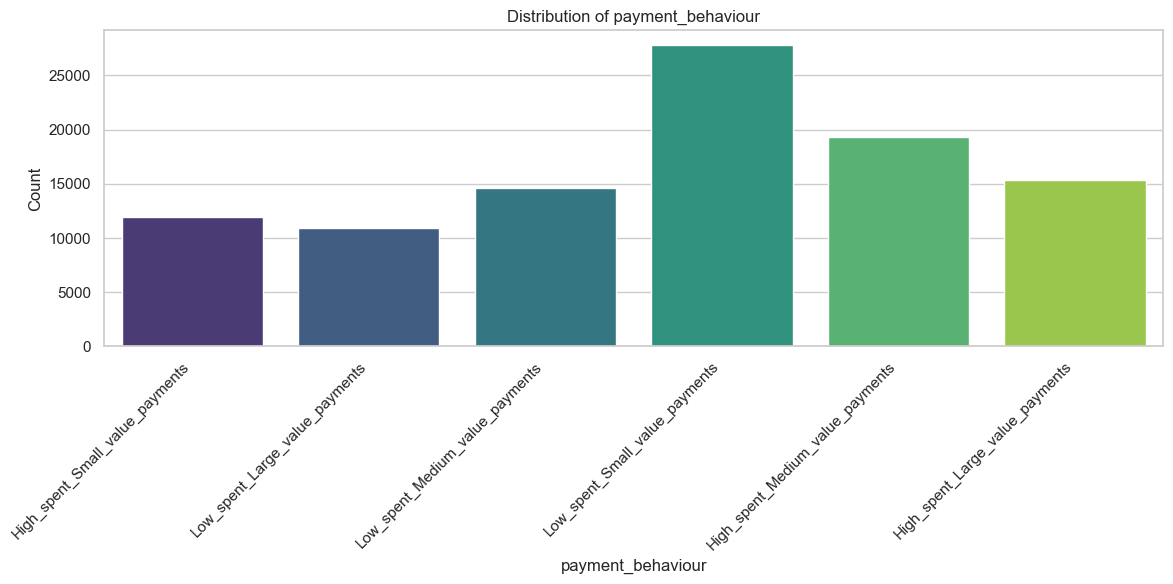

In [71]:
plot_category_distribution(data, 'payment_behaviour')

### Numerical Columns

#### 1. Age
- Convert dtype of age column from string to int.
- There are 5706 rows where age is less than 18.
- Replace ages less than 18 with the mean age.
- There are 8487 rows where age is greater than 95, such as 100, 400, or 500 which seem to be incorrect input values or outliers.
- Replace these values with the corresponding customer's age based on their customer ID.
- For ages greater than 95 that do not have a corresponding customer ID, replace them with the mean age.


In [72]:
data[['age']].describe()

,age
count,100000
unique,1788
top,38
freq,2833


In [73]:
data['age'].dtypes

dtype('O')

In [74]:
data['age'] = data['age'].str.extract('(\d+)').astype(int)
data['age'].dtypes

dtype('int32')

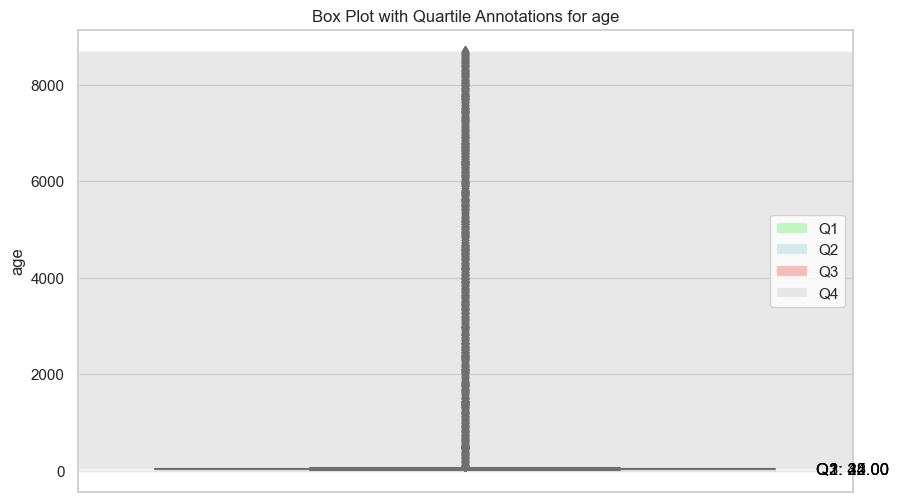

In [75]:
plot_quartile_boxplot(data, 'age')

In [76]:
data[data['age']<18]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
290,0x17b4,CUS_0x4080,March,ra Alperx,16,995-37-8920,Mechanic,29469.98,2227.831667,7,...,Not Specified,3421.66,31.212269,13 Years and 4 Months,Yes,69.685459,32.70665182089997,High_spent_Large_value_payments,360.39105627348687,Standard
291,0x17b5,CUS_0x4080,April,ra Alperx,16,995-37-8920,Mechanic,29469.98,2227.831667,7,...,Bad,3421.66,33.298654,13 Years and 5 Months,Yes,69.685459,27.250794632521444,High_spent_Medium_value_payments,375.84691346186537,Poor
292,0x17b6,CUS_0x4080,May,ra Alperx,16,995-37-8920,Mechanic,29469.98,2227.831667,7,...,Bad,3421.66,38.177311,13 Years and 6 Months,Yes,69.685459,71.26438577406131,Low_spent_Medium_value_payments,361.83332232032564,Poor
293,0x17b7,CUS_0x4080,June,ra Alperx,16,995-37-8920,Mechanic,29469.98_,NaN,7,...,Bad,3421.66,30.986998,13 Years and 7 Months,Yes,69.685459,117.31031613952459,Low_spent_Small_value_payments,325.7873919548623,Poor
294,0x17b8,CUS_0x4080,July,ra Alperx,16,995-37-8920,Mechanic,29469.98,NaN,7,...,Bad,3421.66,33.283061,13 Years and 8 Months,Yes,69.685459,115.45341572596944,Low_spent_Small_value_payments,327.64429236841744,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99803,0x25ec9,CUS_0x1232,April,Lawderr,17,441-26-1297,Developer,14937.49,1142.790833,8,...,Bad,3699.44,31.491509,13 Years and 5 Months,Yes,50.960878,54.53530138743003,Low_spent_Medium_value_payments,278.782904,Standard
99804,0x25eca,CUS_0x1232,May,Lawderr,17,441-26-1297,Developer,14937.49,1142.790833,8,...,Bad,3699.44,38.797247,13 Years and 6 Months,Yes,50.960878,120.03814232732985,Low_spent_Medium_value_payments,233.280063,Standard
99805,0x25ecb,CUS_0x1232,June,Lawderr,17,441-26-1297,Developer,14937.49,1142.790833,8,...,Not Specified,3699.44,30.027427,13 Years and 7 Months,Yes,50.960878,76.54043041585898,High_spent_Small_value_payments,246.777775,Standard
99806,0x25ecc,CUS_0x1232,July,Lawderr,17,441-26-1297,Developer,14937.49,1142.790833,8,...,Bad,3699.44,24.812055,13 Years and 8 Months,Yes,50.960878,100.62530212462157,Low_spent_Medium_value_payments,242.692903,Standard


In [77]:
mean_age = int(np.mean(data.loc[data['age'] >= 18, 'age']))
data.loc[data['age'] < 18, 'age'] = mean_age

In [78]:
# Detect outlier
outliers_age = detect_outliers(data['age'])
# Access min value of outlier
min_age_outlier = outliers_age.min()
min_age_outlier

95

In [79]:
data[data['age'] >= min_age_outlier]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
56,0x1656,CUS_0x5407,January,Annk,7580,500-92-6408,Media Manager,34081.38_,NaN,8,...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.4410091967751,Low_spent_Large_value_payments,298.19215813115227,Poor
113,0x16ab,CUS_0xff4,February,Poornimaf,500,655-05-7666,Entrepreneur,25546.26,NaN,8,...,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard
122,0x16b8,CUS_0x33d2,March,Chalmersa,181,965-46-2491,Scientist,31993.78,2942.148333,6,...,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.25708850339777,Low_spent_Small_value_payments,274.8164466052998,Standard
219,0x1749,CUS_0x3edc,April,Williamso,995,663-16-3845,Accountant,43070.24,3622.186667,3,...,Standard,1233.1,24.331772,19 Years and 5 Months,Yes,30.576085,74.92037487328841,High_spent_Medium_value_payments,506.7222069702167,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,0x25f6f,CUS_0x1619,February,Phil Wahbao,2263,683-59-7399,Media Manager,20059.98,1523.665000,8,...,Good,909.01,25.982154,16 Years and 4 Months,No,45.076827,74.71358019803843,High_spent_Small_value_payments,292.576093,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,500,226-45-0652,Developer,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99950,0x25fa4,CUS_0x51b3,July,Ryana,1342,837-85-9800,Media Manager,59146.36,4908.863333,3,...,Not Specified,418.03,38.199635,20 Years and 7 Months,No,26.778419,502.3763201756033,Low_spent_Small_value_payments,251.731594,Standard
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,500,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard


In [80]:
data[data['customer_id'] == 'CUS_0xd40']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Not Specified,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [81]:
handle_outlier_values(data,'age',min_age_outlier)

"Outliers in column 'age' handled successfully."

In [82]:
data[data['age'] >= min_age_outlier]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
288,0x17b2,CUS_0x4080,January,ra Alperx,6409,995-37-8920,Mechanic,29469.98,2227.831667,1231,...,Not Specified,3421.66,24.639658,NaN,Yes,69.685459,59.825596124675045,High_spent_Medium_value_payments,363.27211196971183,Standard
289,0x17b3,CUS_0x4080,February,ra Alperx,500,995-37-8920,Mechanic,29469.98,2227.831667,7,...,Bad,3421.66,30.268411,13 Years and 3 Months,NM,69.685459,125.49176826031132,High_spent_Small_value_payments,287.6059398340756,Standard
290,0x17b4,CUS_0x4080,March,ra Alperx,125,995-37-8920,Mechanic,29469.98,2227.831667,7,...,Not Specified,3421.66,31.212269,13 Years and 4 Months,Yes,69.685459,32.70665182089997,High_spent_Large_value_payments,360.39105627348687,Standard
291,0x17b5,CUS_0x4080,April,ra Alperx,125,995-37-8920,Mechanic,29469.98,2227.831667,7,...,Bad,3421.66,33.298654,13 Years and 5 Months,Yes,69.685459,27.250794632521444,High_spent_Medium_value_payments,375.84691346186537,Poor
292,0x17b6,CUS_0x4080,May,ra Alperx,125,995-37-8920,Mechanic,29469.98,2227.831667,7,...,Bad,3421.66,38.177311,13 Years and 6 Months,Yes,69.685459,71.26438577406131,Low_spent_Medium_value_payments,361.83332232032564,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99803,0x25ec9,CUS_0x1232,April,Lawderr,125,441-26-1297,Developer,14937.49,1142.790833,8,...,Bad,3699.44,31.491509,13 Years and 5 Months,Yes,50.960878,54.53530138743003,Low_spent_Medium_value_payments,278.782904,Standard
99804,0x25eca,CUS_0x1232,May,Lawderr,125,441-26-1297,Developer,14937.49,1142.790833,8,...,Bad,3699.44,38.797247,13 Years and 6 Months,Yes,50.960878,120.03814232732985,Low_spent_Medium_value_payments,233.280063,Standard
99805,0x25ecb,CUS_0x1232,June,Lawderr,125,441-26-1297,Developer,14937.49,1142.790833,8,...,Not Specified,3699.44,30.027427,13 Years and 7 Months,Yes,50.960878,76.54043041585898,High_spent_Small_value_payments,246.777775,Standard
99806,0x25ecc,CUS_0x1232,July,Lawderr,125,441-26-1297,Developer,14937.49,1142.790833,8,...,Bad,3699.44,24.812055,13 Years and 8 Months,Yes,50.960878,100.62530212462157,Low_spent_Medium_value_payments,242.692903,Standard


In [83]:
mean_age = int(np.mean(data.loc[data['age'] < min_age_outlier, 'age']))
data.loc[data['age'] >= min_age_outlier, 'age'] = mean_age

In [84]:
data[['age']].describe()

,age
count,100000.000000
mean,34.334180
std,9.858149
min,18.000000
25%,26.000000
50%,34.000000
75%,42.000000
max,56.000000


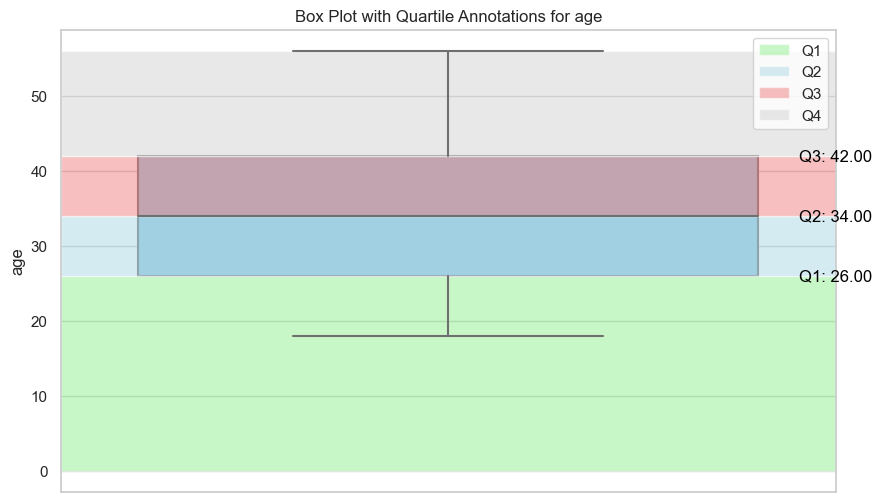

In [85]:
plot_quartile_boxplot(data, 'age')

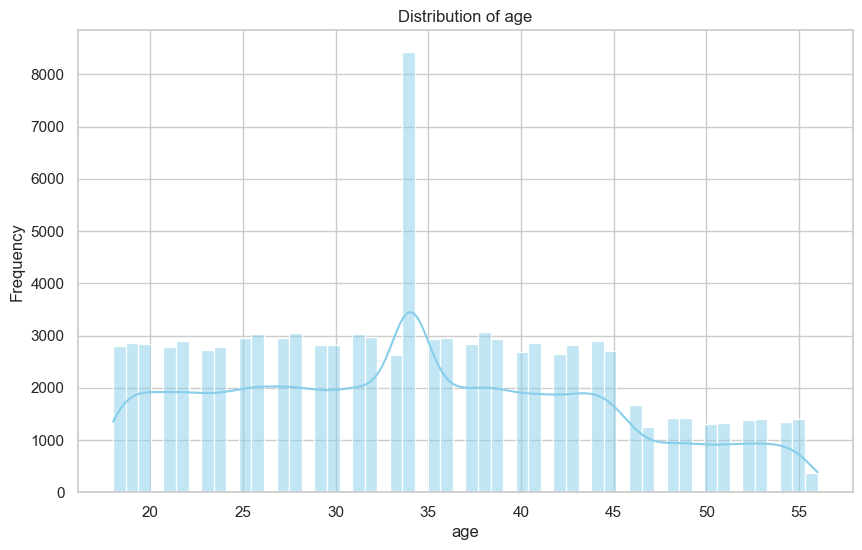

In [86]:
plot_numeric_distribution(data,'age')

#### 2. Annual Income

- Convert dtype of annual income from string to float.
- There are 2783 rows that seem to be outliers.
- Replace these outlier values with the corresponding customer's annual income based on their customer ID.
- For remaining outliers that do not have a corresponding customer ID, drop them.


In [87]:
data[['annual_income']].describe()

,annual_income
count,100000
unique,18940
top,36585.12
freq,16


In [88]:
data['annual_income'].dtypes

dtype('O')

In [89]:
data['annual_income'] = data['annual_income'].str.extract(r'(\d+\.\d+)').astype(float)
data['annual_income'].dtypes

dtype('float64')

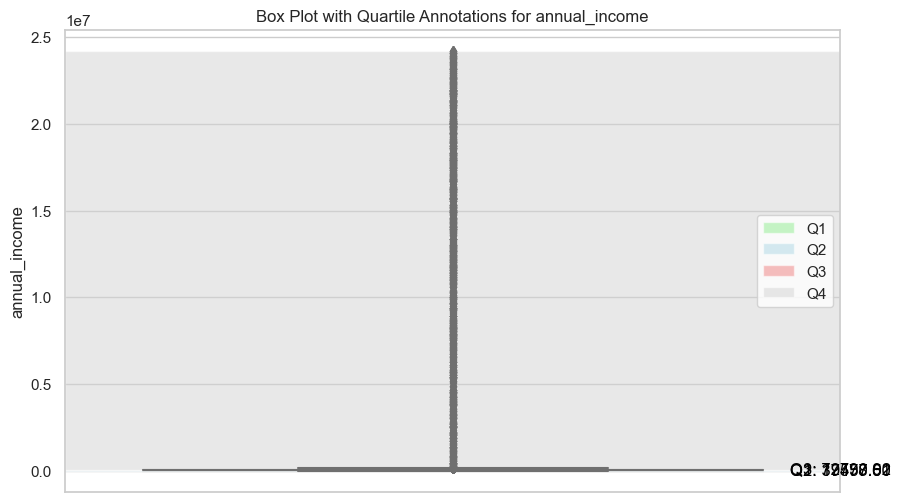

In [90]:
plot_quartile_boxplot(data, 'annual_income')

In [91]:
# Detect Outlier
outliers_income = detect_outliers(data['annual_income'])
# Get the min value of Outlier
min_income_outlier = outliers_income.min()
min_income_outlier

152796.76

In [92]:
data[data['annual_income']>=min_income_outlier]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
54,0x1650,CUS_0x284a,July,Nadiaq,34,411-51-0676,Lawyer,10909427.0,NaN,0,...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,High_spent_Large_value_payments,326.24183015224526,Good
231,0x1759,CUS_0xbffe,August,Dhanya Skariachano,40,311-13-7309,Architect,6515990.0,2210.032500,6,...,Standard,400.07,23.177617,30 Years and 10 Months,Yes,69.602920,51.83085897154975,High_spent_Large_value_payments,339.5694705464602,Standard
245,0x176f,CUS_0x9a71,June,Mukhopadhyayc,55,889-07-2357,Scientist,586359.0,1684.168333,1,...,Good,413.32,28.836349,18 Years and 8 Months,No,29.534584,68.95672493704708,High_spent_Medium_value_payments,319.9255246757902,Good
361,0x181f,CUS_0x8e9b,February,Rachelle Younglaic,34,925-51-5335,Entrepreneur,18334118.0,4369.482500,10,...,Bad,3422.49,36.729939,10 Years and 6 Months,Yes,314.901785,124.54147043620928,High_spent_Small_value_payments,257.50499429610903,Standard
368,0x182a,CUS_0x609d,January,Shupingu,27,911-47-6879,Architect,19717385.0,1057.435833,7,...,Bad,2797.17_,25.314339,13 Years and 11 Months,Yes,58.868441,60.55078556335062,High_spent_Small_value_payments,246.32435693137433,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99664,0x25dfa,CUS_0xb09,January,Lianau,31,228-47-4867,Lawyer,5794377.0,NaN,5,...,Good,928.28,38.616320,NaN,No,72.250125,169.35659164159352,High_spent_Large_value_payments,1210.84895,Standard
99714,0x25e44,CUS_0xadbd,March,Scotts,26,864-24-3672,Doctor,11712577.0,NaN,5,...,Not Specified,82.15,30.711678,23 Years and 1 Months,No,113.833391,121.49249986037856,Low_spent_Small_value_payments,334.657193,Standard
99721,0x25e4f,CUS_0x11c7,February,raden Reddallh,53,646-19-1493,Architect,8544730.0,3198.161667,5,...,Good,1019.46,26.702382,16 Years and 8 Months,No,86.809918,117.83868153104905,High_spent_Medium_value_payments,365.167567,Standard
99882,0x25f40,CUS_0x47fa,March,Yantoultra Nguif,31,291-51-7240,Mechanic,16884797.0,5440.945000,7,...,Standard,330.6,38.524095,23 Years and 0 Months,Yes,0.000000,__10000__,High_spent_Small_value_payments,536.34292,Standard


In [93]:
data[data['customer_id'] == 'CUS_0x284a']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
48,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,131313.4,11242.783333,0,...,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.1712535207537,High_spent_Medium_value_payments,858.462474411158,Good
49,0x164b,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,131313.4,11242.783333,0,...,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.8732707169384,High_spent_Small_value_payments,547.7604572149734,Good
50,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,31.803134,30 Years and 9 Months,NM,911.220179,188.06432109973838,High_spent_Large_value_payments,1038.5694068321734,Good
51,0x164d,CUS_0x284a,April,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good
52,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,40.902517,30 Years and 11 Months,No,32662.000000,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good
53,0x164f,CUS_0x284a,June,Nadiaq,34,411-51-0676,Lawyer,131313.4,NaN,0,...,Good,352.16,41.980170,31 Years and 0 Months,No,911.220179,86.56638801207531,High_spent_Large_value_payments,1140.0673399198365,Standard
54,0x1650,CUS_0x284a,July,Nadiaq,34,411-51-0676,Lawyer,10909427.0,NaN,0,...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,High_spent_Large_value_payments,326.24183015224526,Good
55,0x1651,CUS_0x284a,August,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,29.187913,31 Years and 2 Months,No,911.220179,870.52238171816,Low_spent_Medium_value_payments,396.1113462137519,Good


In [94]:
handle_outlier_values(data,'annual_income',min_income_outlier)

"Outliers in column 'annual_income' handled successfully."

In [95]:
data[data['customer_id'] == 'CUS_0x284a']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
48,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,131313.4,11242.783333,0,...,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.1712535207537,High_spent_Medium_value_payments,858.462474411158,Good
49,0x164b,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,131313.4,11242.783333,0,...,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.8732707169384,High_spent_Small_value_payments,547.7604572149734,Good
50,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,31.803134,30 Years and 9 Months,NM,911.220179,188.06432109973838,High_spent_Large_value_payments,1038.5694068321734,Good
51,0x164d,CUS_0x284a,April,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good
52,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,40.902517,30 Years and 11 Months,No,32662.000000,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good
53,0x164f,CUS_0x284a,June,Nadiaq,34,411-51-0676,Lawyer,131313.4,NaN,0,...,Good,352.16,41.980170,31 Years and 0 Months,No,911.220179,86.56638801207531,High_spent_Large_value_payments,1140.0673399198365,Standard
54,0x1650,CUS_0x284a,July,Nadiaq,34,411-51-0676,Lawyer,131313.4,NaN,0,...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,High_spent_Large_value_payments,326.24183015224526,Good
55,0x1651,CUS_0x284a,August,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,29.187913,31 Years and 2 Months,No,911.220179,870.52238171816,Low_spent_Medium_value_payments,396.1113462137519,Good


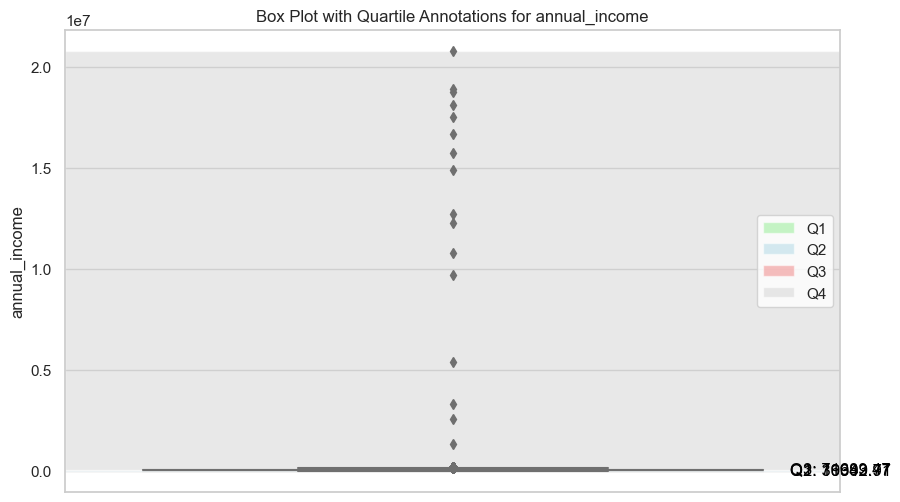

In [96]:
plot_quartile_boxplot(data, 'annual_income')

In [97]:
data.drop(data[data['annual_income'] > min_income_outlier].index, inplace=True)

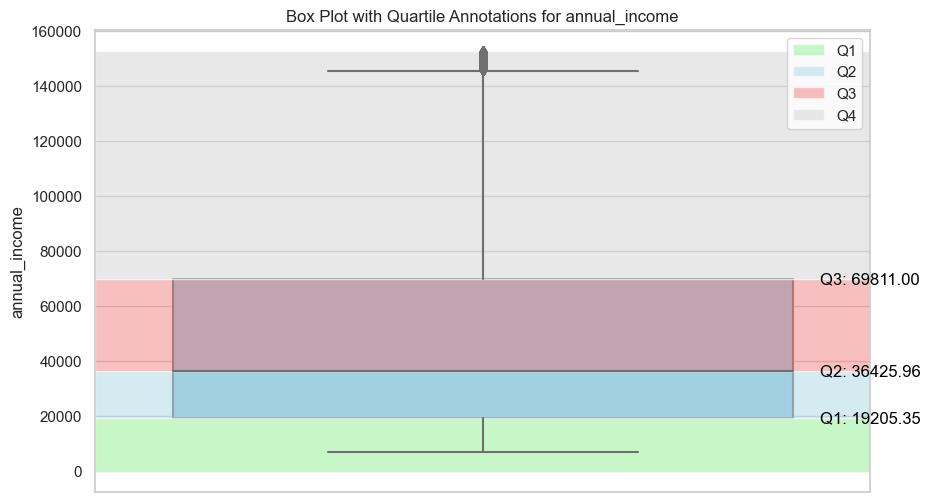

In [98]:
plot_quartile_boxplot(data, 'annual_income')

In [99]:
data[['annual_income']].describe()

,annual_income
count,98208.000000
mean,48364.972267
std,35171.366146
min,7005.930000
25%,19205.346250
50%,36425.960000
75%,69811.000000
max,152796.760000


#### 3. Monthly Inhand Salary

- There are 14703 rows with NaN values.
- Replace NaN values with the mode vaues of customers' monthly inhand salary corresponding to their customer IDs.
- 724 rows seem to be outlier values.
- Replace outlier values with the mode alues of customers' monthly inhand salary corresponding to their customer IDs.
- Drop remaining outlier values.


In [100]:
data[['monthly_inhand_salary']].describe()

,monthly_inhand_salary
count,83505.000000
mean,4019.508399
std,2927.866596
min,303.645417
25%,1615.541667
50%,3043.851667
75%,5806.736667
max,12901.420000


In [101]:
data[data['monthly_inhand_salary'].isnull()]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.30622796053305,Low_spent_Medium_value_payments,465.6762241330048,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,0x25f9e,CUS_0x51b3,January,Ryana,33,837-85-9800,Media Manager,59146.36,NaN,2,...,Not Specified,418.03,34.720661,NaN,No,26.778419,606.4365424304076,Low_spent_Small_value_payments,147.671372,Standard
99955,0x25fad,CUS_0x2084,April,Ryanl,21,253-72-7758,Architect,38321.39,NaN,4,...,Good,678.57,35.455305,17 Years and 2 Months,No,362.072453,293.71319332766717,Low_spent_Large_value_payments,197.460577,Standard
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard
99975,0x25fc9,CUS_0xf16,August,Maria Sheahanb,45,868-70-2218,Media Manager,16680.35,NaN,1,...,Good,897.16,41.212367,NaN,No,41.113561,70.8055497847255,Low_spent_Large_value_payments,310.883806,Good


In [102]:
data[data['customer_id'] == 'CUS_0xd40']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Not Specified,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [103]:
handle_missing_values(data,'monthly_inhand_salary')

"Missing values in column 'monthly_inhand_salary' handled successfully."

In [104]:
data[data['customer_id'] == 'CUS_0xd40']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Not Specified,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [105]:
data['monthly_inhand_salary'].isnull().sum()

0

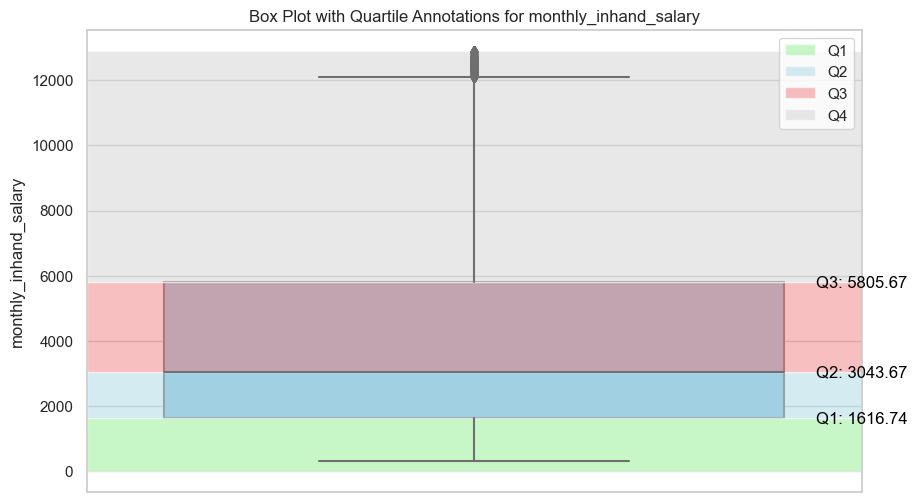

In [106]:
plot_quartile_boxplot(data, 'monthly_inhand_salary')

In [107]:
# Detect outlier 
outliers_salary = detect_outliers(data['monthly_inhand_salary'])
# Get the min value of outlier
min_salary_outlier = outliers_salary.min()
min_salary_outlier

12090.136666666667

In [108]:
data[data['monthly_inhand_salary']>=min_salary_outlier]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,High_spent_Small_value_payments,1043.3159778669492,Good
17,0x161b,CUS_0x2dbc,February,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Not Specified,1303.01,39.501648,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99667,0x25dfd,CUS_0xb09,April,Lianau,31,228-47-4867,Lawyer,146310.68,12124.556667,5,...,Good,928.28,35.389329,22 Years and 4 Months,No,72.250125,1186.575072534232,Low_spent_Medium_value_payments,233.63047,Good
99668,0x25dfe,CUS_0xb09,May,Lianau,31,228-47-4867,Lawyer,146310.68,12124.556667,5,...,Not Specified,928.28,25.549118,22 Years and 5 Months,No,72.250125,787.5239039901932,Low_spent_Medium_value_payments,632.681638,Standard
99669,0x25dff,CUS_0xb09,June,Lianau,31,228-47-4867,Lawyer,146310.68,12124.556667,5,...,Good,928.28,33.148339,22 Years and 6 Months,No,72.250125,477.463230272804,High_spent_Medium_value_payments,912.742312,Standard
99670,0x25e00,CUS_0xb09,July,Lianau,31,228-47-4867,Lawyer,146310.68,12124.556667,5,...,Good,928.28,32.394966,22 Years and 7 Months,No,33738.000000,768.8588939658162,Low_spent_Large_value_payments,641.346648,Standard


In [109]:
data[data['customer_id'] == 'CUS_0x2dbc']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,High_spent_Small_value_payments,1043.3159778669492,Good
17,0x161b,CUS_0x2dbc,February,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Not Specified,1303.01,39.501648,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
21,0x161f,CUS_0x2dbc,June,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,39.783993,18 Years and 2 Months,No,246.992319,257.80809942568976,High_spent_Medium_value_payments,963.9215811205684,Good
22,0x1620,CUS_0x2dbc,July,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,__10000__,High_spent_Small_value_payments,895.494583180492,Standard


In [110]:
handle_outlier_values(data,'monthly_inhand_salary',min_salary_outlier)

"Outliers in column 'monthly_inhand_salary' handled successfully."

In [111]:
data[data['customer_id'] == 'CUS_0x2dbc']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,High_spent_Small_value_payments,1043.3159778669492,Good
17,0x161b,CUS_0x2dbc,February,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Not Specified,1303.01,39.501648,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
21,0x161f,CUS_0x2dbc,June,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,39.783993,18 Years and 2 Months,No,246.992319,257.80809942568976,High_spent_Medium_value_payments,963.9215811205684,Good
22,0x1620,CUS_0x2dbc,July,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,__10000__,High_spent_Small_value_payments,895.494583180492,Standard


In [112]:
data.drop(data[data['monthly_inhand_salary'] > min_salary_outlier].index, inplace=True)

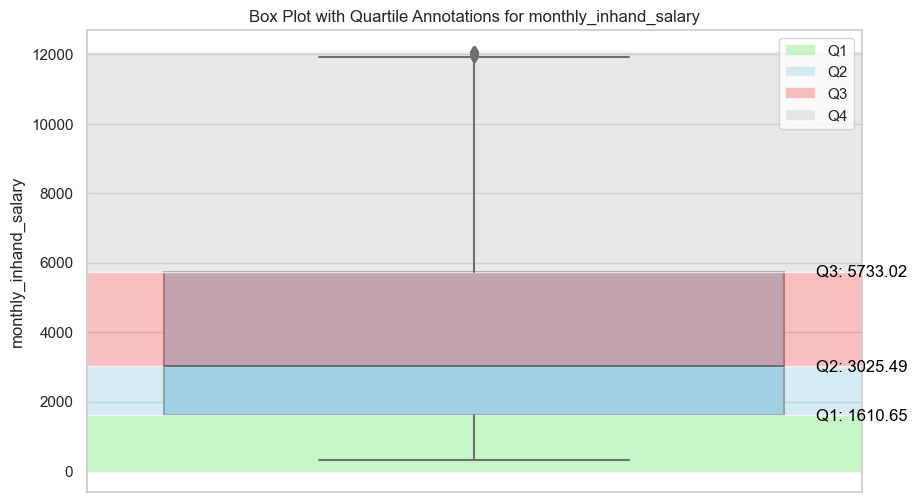

In [113]:
plot_quartile_boxplot(data, 'monthly_inhand_salary')

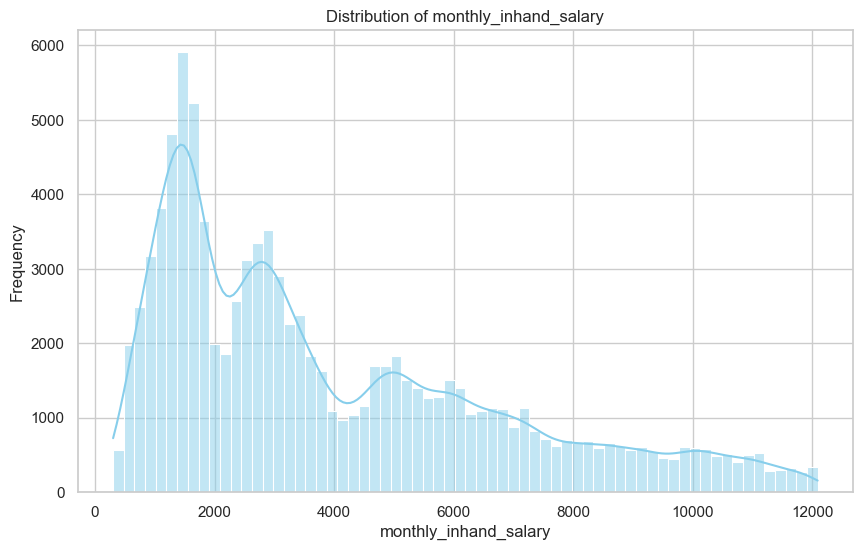

In [114]:
plot_numeric_distribution(data,'monthly_inhand_salary')

#### 4. Number of Bank Accounts

- There are 1285 rows that seem to be outlier values.
- Replace outlier values with the mode value of the customer's number of bank accounts corresponding to their customer ID.


In [115]:
data[['num_bank_accounts']].describe()

,num_bank_accounts
count,97528.000000
mean,17.182542
std,117.525128
min,-1.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,1798.000000


In [116]:
data['num_bank_accounts'] = data['num_bank_accounts'].abs()

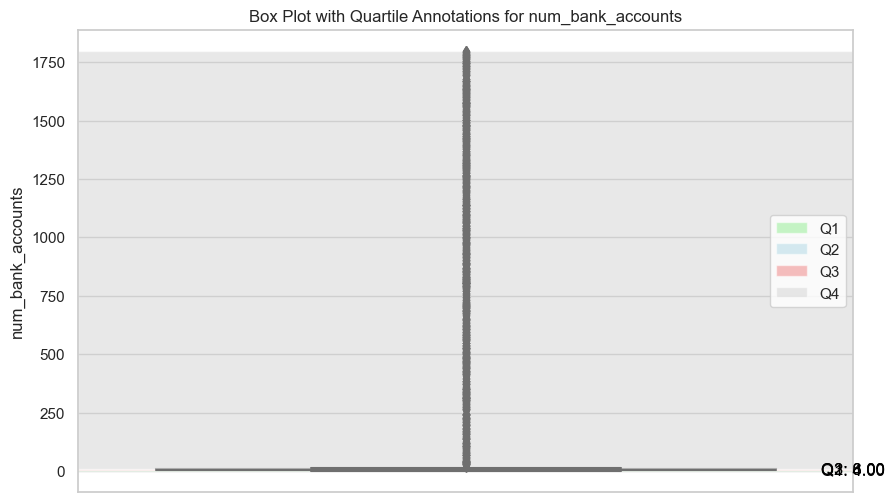

In [117]:
plot_quartile_boxplot(data, 'num_bank_accounts')

In [118]:
# Detect outlier
outliers_num_account = detect_outliers(data['num_bank_accounts'])
# Get the min value of outlier
min_num_account_outlier = outliers_num_account.min()
min_num_account_outlier

18

In [119]:
data[data['num_bank_accounts']>=min_num_account_outlier]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
267,0x1791,CUS_0x4004,April,Carlosj,44,679-26-6464,Writer,58317.00,4664.750000,1414,...,Standard,98.97,29.766107,NaN,Yes,149.897199,158.64827595455043,High_spent_Medium_value_payments,407.9295246244412,Standard
288,0x17b2,CUS_0x4080,January,ra Alperx,34,995-37-8920,Mechanic,29469.98,2227.831667,1231,...,Not Specified,3421.66,24.639658,NaN,Yes,69.685459,59.825596124675045,High_spent_Medium_value_payments,363.27211196971183,Standard
310,0x17d0,CUS_0x42ac,July,Lawrencea,37,700-60-3660,Musician,15566.02,1423.168333,67,...,Standard,1693.95,29.706454,8 Years and 4 Months,Yes,43.070520,80.48442010154183,Low_spent_Small_value_payments,308.76189362947565,Poor
339,0x17fd,CUS_0x9bc1,April,Jaisinghanij,42,445-18-4420,Architect,20574.47,1740.539167,572,...,Standard,749.95,36.559538,11 Years and 2 Months,Yes,49.348666,25.161404432750263,High_spent_Medium_value_payments,349.54384591241774,Standard
356,0x1816,CUS_0xaedb,May,Olivia Oranr,19,272-47-1135,Musician,85554.03,7185.502500,1488,...,Not Specified,1095.73,41.661802,19 Years and 11 Months,No,0.000000,70.82263261910934,High_spent_Large_value_payments,887.7276173808908,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99570,0x25d6c,CUS_0x1b3b,March,Greg Roumeliotisq,49,473-62-8692,Lawyer,76624.48,6123.373333,891,...,Good,781.42,37.500417,17 Years and 7 Months,No,0.000000,__10000__,Low_spent_Large_value_payments,490.929278,Good
99591,0x25d89,CUS_0x544,August,Jon Herskovitzu,29,163-45-1172,Mechanic,17013.29,1326.774167,813,...,Not Specified,1452.79,28.051684,32 Years and 6 Months,NM,13.109663,55.72695329443804,Low_spent_Small_value_payments,353.840801,Good
99638,0x25dd0,CUS_0x296f,July,David Millikenh,25,972-13-0672,Developer,125271.96,10374.330000,1481,...,Good,827.56,33.201730,25 Years and 8 Months,NM,241.065885,180.56001463373025,High_spent_Large_value_payments,855.8071,Poor
99722,0x25e50,CUS_0x11c7,March,raden Reddallh,53,646-19-1493,Architect,36817.94,3198.161667,697,...,Good,1019.46,26.578799,16 Years and 9 Months,No,86.809918,123.91555910514948,Low_spent_Small_value_payments,399.09069,Standard


In [120]:
data[data['customer_id'] == 'CUS_0x4004']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
264,0x178e,CUS_0x4004,January,Carlosj,43,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,40.411115,13 Years and 1 Months,Yes,149.897199,109.48894961827229,High_spent_Medium_value_payments,467.0888509607195,Standard
265,0x178f,CUS_0x4004,February,Carlosj,43,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,27.806918,13 Years and 2 Months,Yes,149.897199,83.30040818642512,High_spent_Medium_value_payments,483.2773923925665,Standard
266,0x1790,CUS_0x4004,March,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,8,...,Not Specified,98.97,25.832109,13 Years and 3 Months,Yes,149.897199,57.95122336180115,High_spent_Large_value_payments,498.6265772171906,Standard
267,0x1791,CUS_0x4004,April,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,1414,...,Standard,98.97,29.766107,NaN,Yes,149.897199,158.64827595455043,High_spent_Medium_value_payments,407.9295246244412,Standard
268,0x1792,CUS_0x4004,May,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,34.192304,13 Years and 5 Months,Yes,149.897199,180.83057335204728,Low_spent_Medium_value_payments,415.7472272269445,Standard
269,0x1793,CUS_0x4004,June,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,24.665525,13 Years and 6 Months,Yes,149.897199,98.88050778293751,High_spent_Medium_value_payments,467.6972927960543,Standard
270,0x1794,CUS_0x4004,July,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,28.260147,13 Years and 7 Months,Yes,149.897199,380.5857010101063,Low_spent_Medium_value_payments,215.9920995688854,Standard
271,0x1795,CUS_0x4004,August,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,36.763665,13 Years and 8 Months,Yes,149.897199,59.955987495996,High_spent_Medium_value_payments,506.62181308299586,Standard


In [121]:
handle_outlier_values(data,'num_bank_accounts',min_num_account_outlier)

"Outliers in column 'num_bank_accounts' handled successfully."

In [122]:
data[data['customer_id'] == 'CUS_0x4004']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
264,0x178e,CUS_0x4004,January,Carlosj,43,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,40.411115,13 Years and 1 Months,Yes,149.897199,109.48894961827229,High_spent_Medium_value_payments,467.0888509607195,Standard
265,0x178f,CUS_0x4004,February,Carlosj,43,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,27.806918,13 Years and 2 Months,Yes,149.897199,83.30040818642512,High_spent_Medium_value_payments,483.2773923925665,Standard
266,0x1790,CUS_0x4004,March,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,8,...,Not Specified,98.97,25.832109,13 Years and 3 Months,Yes,149.897199,57.95122336180115,High_spent_Large_value_payments,498.6265772171906,Standard
267,0x1791,CUS_0x4004,April,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,29.766107,NaN,Yes,149.897199,158.64827595455043,High_spent_Medium_value_payments,407.9295246244412,Standard
268,0x1792,CUS_0x4004,May,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,34.192304,13 Years and 5 Months,Yes,149.897199,180.83057335204728,Low_spent_Medium_value_payments,415.7472272269445,Standard
269,0x1793,CUS_0x4004,June,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,24.665525,13 Years and 6 Months,Yes,149.897199,98.88050778293751,High_spent_Medium_value_payments,467.6972927960543,Standard
270,0x1794,CUS_0x4004,July,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,28.260147,13 Years and 7 Months,Yes,149.897199,380.5857010101063,Low_spent_Medium_value_payments,215.9920995688854,Standard
271,0x1795,CUS_0x4004,August,Carlosj,44,679-26-6464,Writer,58317.0,4664.75,8,...,Standard,98.97,36.763665,13 Years and 8 Months,Yes,149.897199,59.955987495996,High_spent_Medium_value_payments,506.62181308299586,Standard


In [123]:
data[['num_bank_accounts']].describe()

,num_bank_accounts
count,97528.000000
mean,5.433588
std,2.577748
min,0.000000
25%,4.000000
50%,6.000000
75%,7.000000
max,11.000000


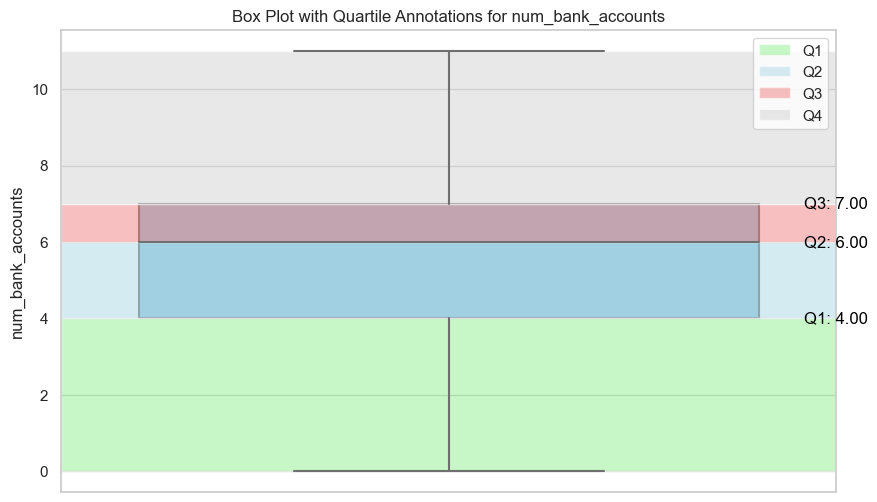

In [124]:
plot_quartile_boxplot(data, 'num_bank_accounts')

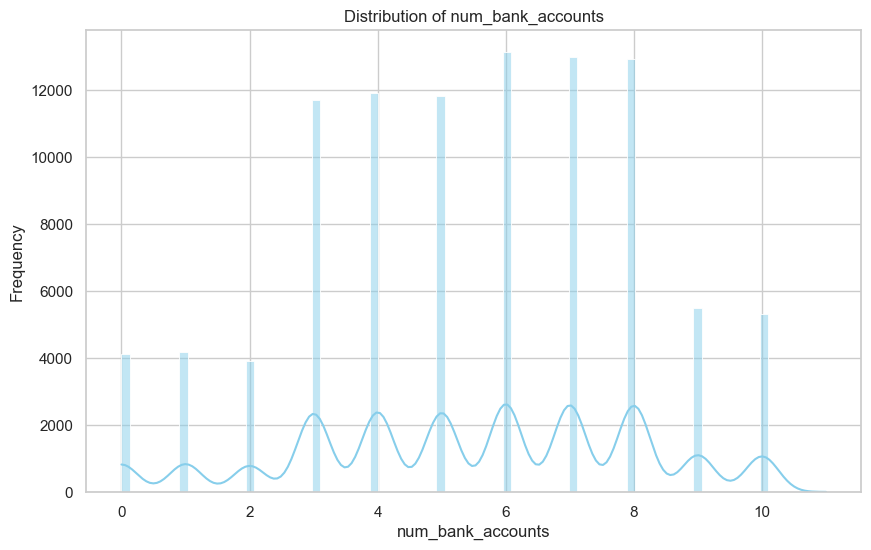

In [125]:
plot_numeric_distribution(data,'num_bank_accounts')

#### 5. Number of Credit Card

- There are 2218 rows that appear to be outliers.
- Replace outlier values with the mode value of the customer's number of credit cards corresponding to their customer ID.


In [126]:
data[['num_credit_cards']].describe()

,num_credit_cards
count,97528.000000
mean,22.556896
std,129.240384
min,0.000000
25%,4.000000
50%,6.000000
75%,7.000000
max,1499.000000


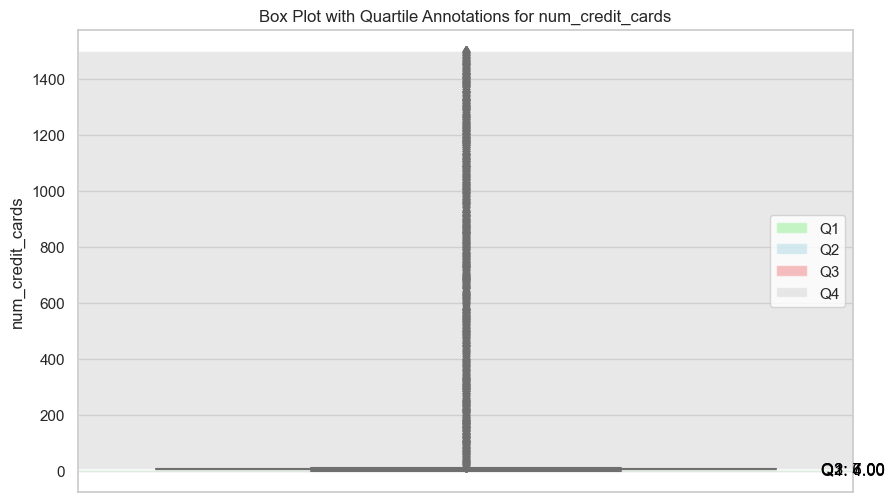

In [127]:
plot_quartile_boxplot(data, 'num_credit_cards')

In [128]:
# Detect outlier
outliers_num_card = detect_outliers(data['num_credit_cards'])
# Get the min value of outlier
min_num_card_outlier = outliers_num_card.min()
min_num_card_outlier

15

In [129]:
data[data['num_credit_cards']>=min_num_card_outlier][['customer_id','num_credit_cards', 'credit_score']]

,customer_id,num_credit_cards,credit_score
10,CUS_0x21b1,1385,Standard
40,CUS_0x95ee,1288,Good
157,CUS_0x4100,1029,Poor
163,CUS_0x132f,488,Poor
207,CUS_0x4d43,1381,Standard
...,...,...,...
99611,CUS_0x2829,514,Standard
99615,CUS_0x2829,232,Standard
99619,CUS_0xae66,1430,Standard
99769,CUS_0xc345,679,Standard


In [130]:
data[data['customer_id'] == 'CUS_0x21b1'][['customer_id','num_credit_cards', 'credit_score']]

,customer_id,num_credit_cards,credit_score
8,CUS_0x21b1,4,Standard
9,CUS_0x21b1,4,Good
10,CUS_0x21b1,1385,Standard
11,CUS_0x21b1,4,Good
12,CUS_0x21b1,4,Good
13,CUS_0x21b1,4,Good
14,CUS_0x21b1,4,Good
15,CUS_0x21b1,4,Good


In [131]:
handle_outlier_values(data,'num_credit_cards',min_num_card_outlier)

"Outliers in column 'num_credit_cards' handled successfully."

In [132]:
data[data['customer_id'] == 'CUS_0x21b1'][['customer_id','num_credit_cards', 'credit_score']]

,customer_id,num_credit_cards,credit_score
8,CUS_0x21b1,4,Standard
9,CUS_0x21b1,4,Good
10,CUS_0x21b1,4,Standard
11,CUS_0x21b1,4,Good
12,CUS_0x21b1,4,Good
13,CUS_0x21b1,4,Good
14,CUS_0x21b1,4,Good
15,CUS_0x21b1,4,Good


In [133]:
data[['num_credit_cards']].describe()

,num_credit_cards
count,97528.000000
mean,5.562362
std,2.067495
min,0.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,11.000000


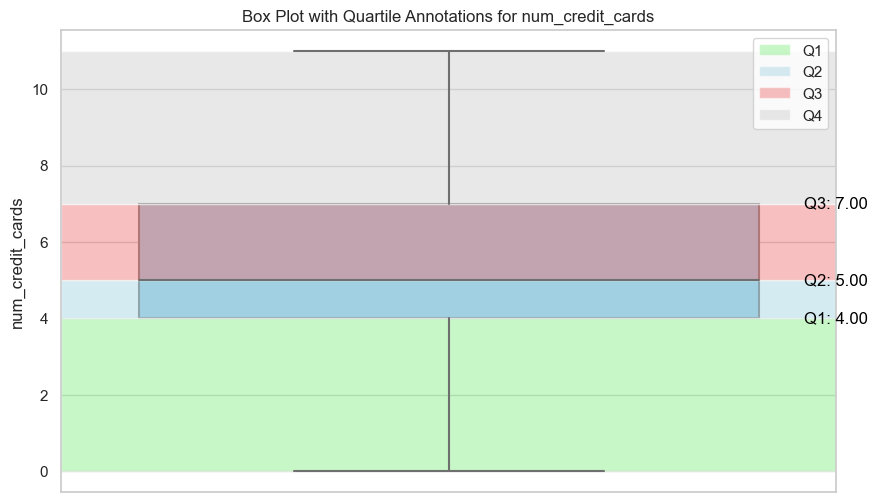

In [134]:
plot_quartile_boxplot(data, 'num_credit_cards')

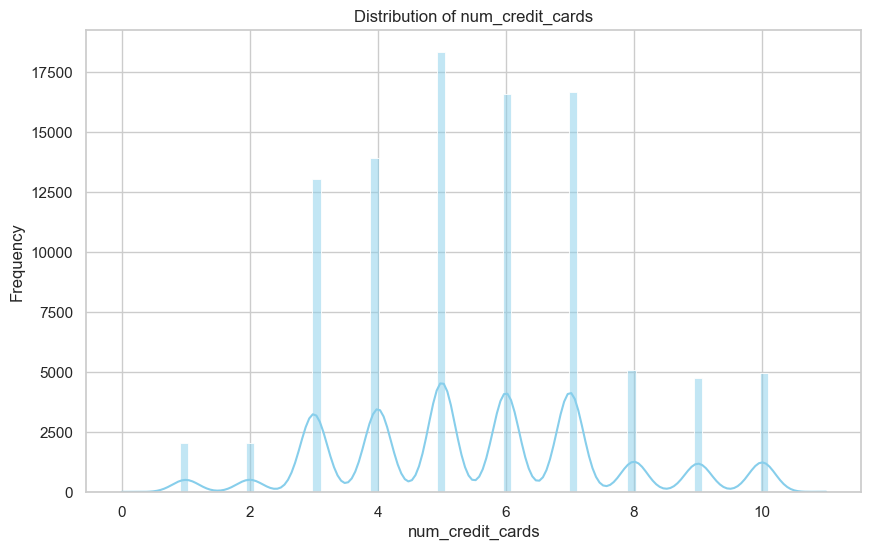

In [135]:
plot_numeric_distribution(data,'num_credit_cards')

#### 6. Interest Rate

- There are 1993 rows that appear to be outliers.
- Replace outlier values with the mode value of the customer's interest rate corresponding to their customer ID.


In [136]:
data[['interest_rate']].describe()

,interest_rate
count,97528.000000
mean,73.222172
std,469.244537
min,1.000000
25%,8.000000
50%,14.000000
75%,21.000000
max,5797.000000


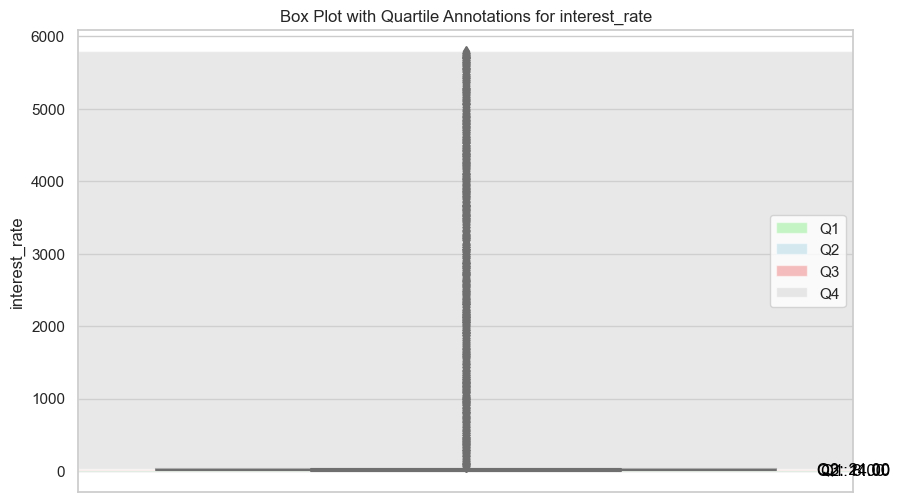

In [137]:
plot_quartile_boxplot(data, 'interest_rate')

In [138]:
# Detect Outlier
outliers_rate = detect_outliers(data['interest_rate'])
# Get the min value of outlier
min_rate_outlier = outliers_rate.min()
min_rate_outlier

59

In [139]:
data[data['interest_rate']>=min_rate_outlier][['customer_id','interest_rate', 'credit_score']]

,customer_id,interest_rate,credit_score
44,CUS_0x95ee,5318,Good
89,CUS_0xc0ab,433,Good
167,CUS_0x132f,5240,Poor
178,CUS_0xac86,4975,Good
229,CUS_0xbffe,668,Standard
...,...,...,...
99791,CUS_0x62f5,4396,Good
99801,CUS_0x1232,387,Standard
99882,CUS_0x47fa,1947,Standard
99914,CUS_0x1619,360,Poor


In [140]:
data[data['customer_id'] == 'CUS_0x95ee'][['customer_id','interest_rate', 'credit_score']]

,customer_id,interest_rate,credit_score
40,CUS_0x95ee,8,Good
41,CUS_0x95ee,8,Good
42,CUS_0x95ee,8,Good
43,CUS_0x95ee,8,Good
44,CUS_0x95ee,5318,Good
45,CUS_0x95ee,8,Good
46,CUS_0x95ee,8,Standard
47,CUS_0x95ee,8,Good


In [141]:
handle_outlier_values(data,'interest_rate',min_rate_outlier)

"Outliers in column 'interest_rate' handled successfully."

In [142]:
data[data['customer_id'] == 'CUS_0x95ee'][['customer_id','interest_rate', 'credit_score']]

,customer_id,interest_rate,credit_score
40,CUS_0x95ee,8,Good
41,CUS_0x95ee,8,Good
42,CUS_0x95ee,8,Good
43,CUS_0x95ee,8,Good
44,CUS_0x95ee,8,Good
45,CUS_0x95ee,8,Good
46,CUS_0x95ee,8,Standard
47,CUS_0x95ee,8,Good


In [143]:
data[['interest_rate']].describe()

,interest_rate
count,97528.000000
mean,14.723977
std,8.745022
min,1.000000
25%,8.000000
50%,14.000000
75%,20.000000
max,34.000000


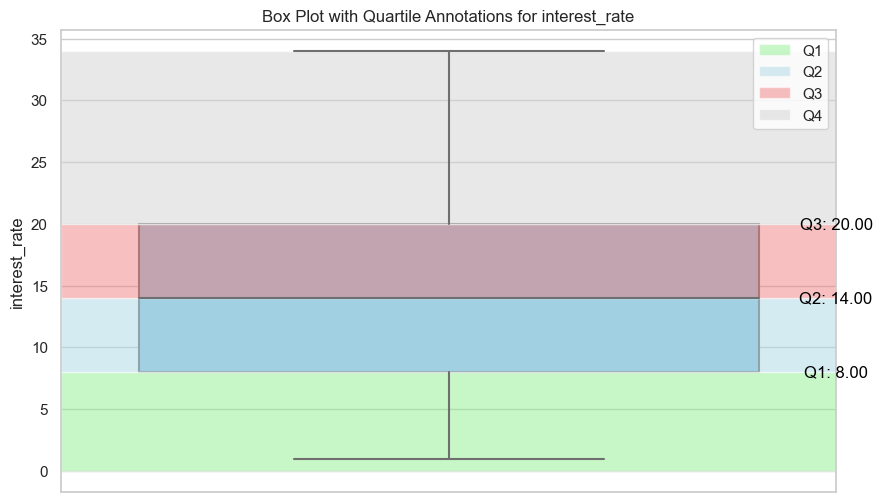

In [144]:
plot_quartile_boxplot(data, 'interest_rate')

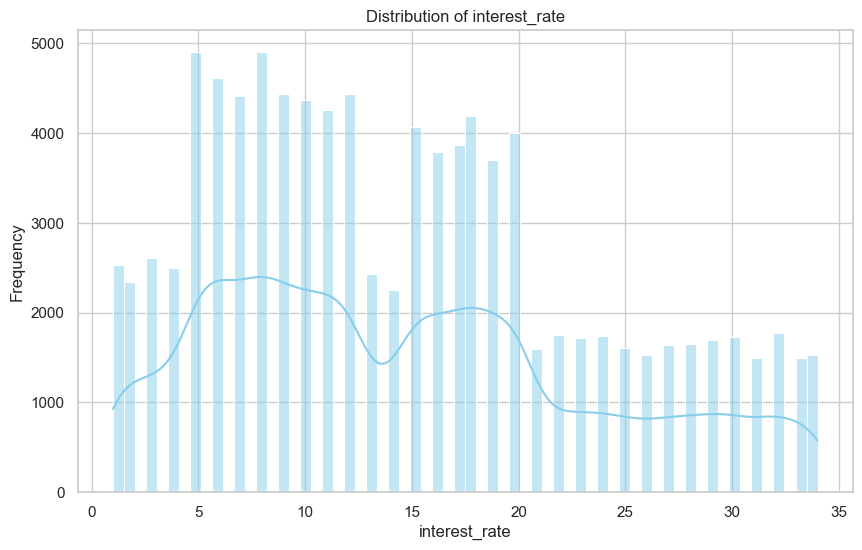

In [145]:
plot_numeric_distribution(data,'interest_rate')

#### 7. Number of Loans

- Convert the data type of the number of loan column from string to int.
- There are 4247 rows that appear to be outliers.
- Replace outlier values with the mode value of the customer's number of loans corresponding to their customer ID.


In [146]:
data[['num_of_loans']].describe()

,num_of_loans
count,97528
unique,420
top,3
freq,13912


In [147]:
data['num_of_loans'].dtypes

dtype('O')

In [148]:
data['num_of_loans'] = data['num_of_loans'].str.extract('(\d+)').astype(int)
data['num_of_loans'].dtypes

dtype('int32')

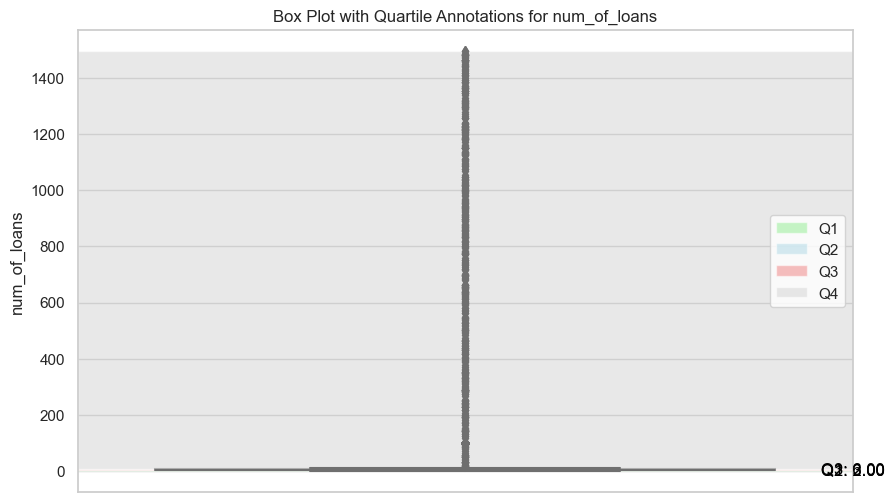

In [149]:
plot_quartile_boxplot(data, 'num_of_loans')

In [150]:
# Detect outlier
outliers_num_loan = detect_outliers(data['num_of_loans'])
# Get the min value of outlier
min_num_loan_outlier = outliers_num_loan.min()
min_num_loan_outlier

17

In [151]:
data[data['num_of_loans']>=min_num_loan_outlier][['customer_id','num_of_loans', 'credit_score']]

,customer_id,num_of_loans,credit_score
31,CUS_0xb891,100,Standard
34,CUS_0x1cdb,100,Standard
39,CUS_0x1cdb,100,Standard
53,CUS_0x284a,100,Standard
61,CUS_0x5407,100,Standard
...,...,...,...
99901,CUS_0x4986,100,Good
99902,CUS_0x4986,100,Good
99919,CUS_0x1619,966,Poor
99969,CUS_0xf16,100,Good


In [152]:
data[data['customer_id'] == 'CUS_0xb891'][['customer_id','num_of_loans', 'credit_score']]

,customer_id,num_of_loans,credit_score
24,CUS_0xb891,1,Standard
25,CUS_0xb891,1,Standard
26,CUS_0xb891,1,Standard
27,CUS_0xb891,1,Standard
28,CUS_0xb891,1,Standard
29,CUS_0xb891,1,Standard
30,CUS_0xb891,1,Standard
31,CUS_0xb891,100,Standard


In [153]:
handle_outlier_values(data,'num_of_loans',min_num_loan_outlier)

"Outliers in column 'num_of_loans' handled successfully."

In [154]:
data[data['customer_id'] == 'CUS_0xb891'][['customer_id','num_of_loans', 'credit_score']]

,customer_id,num_of_loans,credit_score
24,CUS_0xb891,1,Standard
25,CUS_0xb891,1,Standard
26,CUS_0xb891,1,Standard
27,CUS_0xb891,1,Standard
28,CUS_0xb891,1,Standard
29,CUS_0xb891,1,Standard
30,CUS_0xb891,1,Standard
31,CUS_0xb891,1,Standard


In [155]:
data[['num_of_loans']].describe()

,num_of_loans
count,97528.000000
mean,3.571897
std,2.454499
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,9.000000


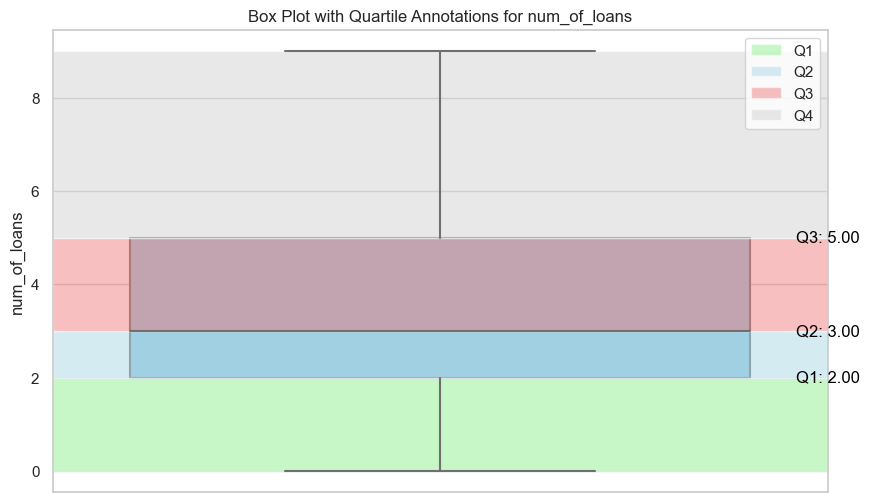

In [156]:
plot_quartile_boxplot(data, 'num_of_loans')

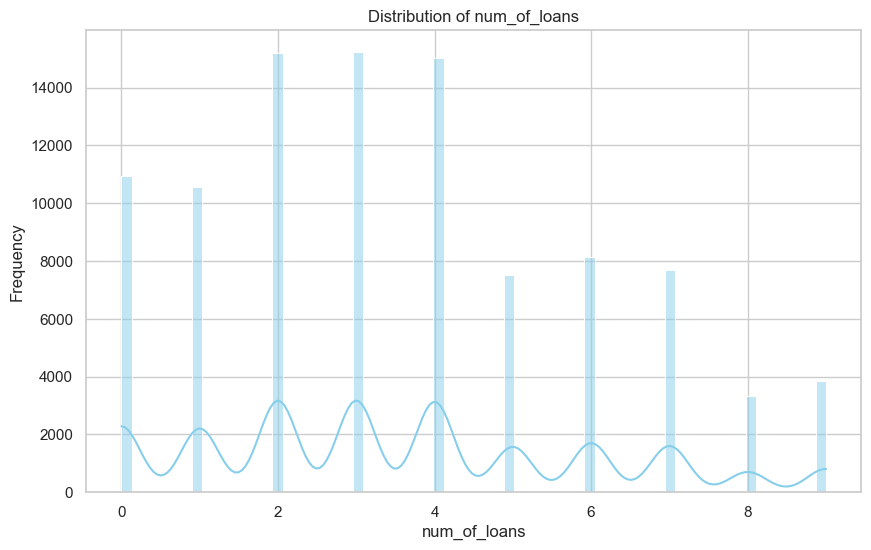

In [157]:
plot_numeric_distribution(data,'num_of_loans')

#### 8. Delay from Due Date

- No cleaning is needed in this column.


In [158]:
data[['delay_from_due_date']].describe()

,delay_from_due_date
count,97528.000000
mean,21.351858
std,14.895707
min,-5.000000
25%,10.000000
50%,18.000000
75%,28.000000
max,67.000000


In [159]:
data['delay_from_due_date'] = data['delay_from_due_date'].abs()

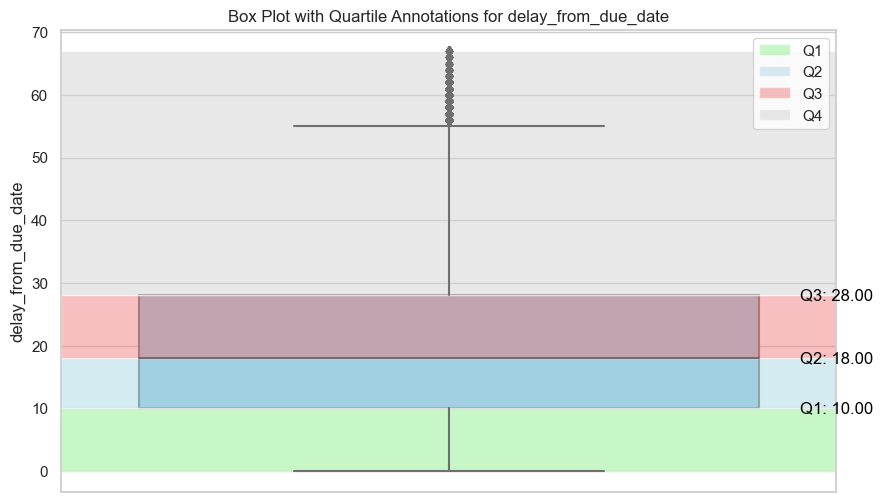

In [160]:
plot_quartile_boxplot(data, 'delay_from_due_date')

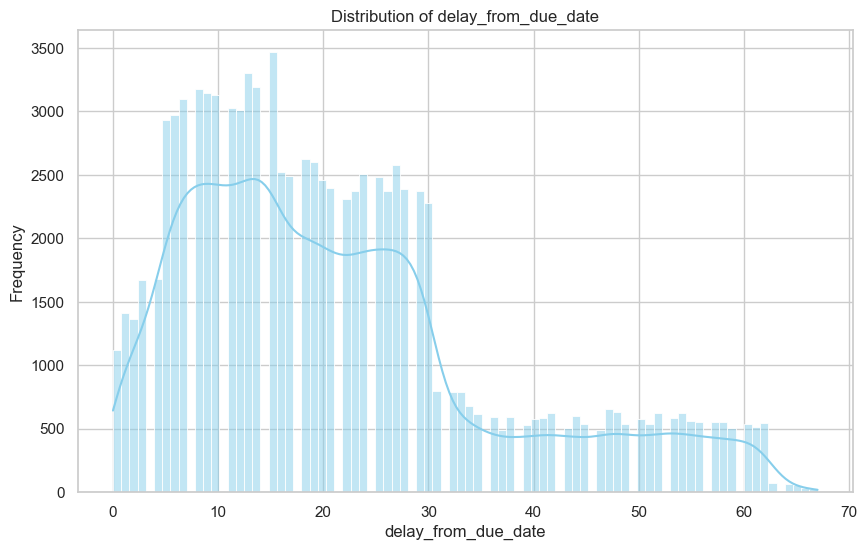

In [161]:
plot_numeric_distribution(data,'delay_from_due_date')

#### 9. Changed Credit Limit

- Convert the data type of the changed credit limit column from string to float.
- There are 2034 rows with NaN values.
- Replace NaN values with the mode value of the customer's changed credit limit corresponding to their customer ID.
- There are 1608 rows that appear to be outliers.
- Replace outlier values with the mode value of the customer's changed credit limit corresponding to their customer ID.


In [162]:
data[['changed_credit_limit']].describe()

,changed_credit_limit
count,97528
unique,4370
top,_
freq,2034


In [163]:
data[['changed_credit_limit']].dtypes

changed_credit_limit    object
dtype: object

In [164]:
data['changed_credit_limit'] = data['changed_credit_limit'].str.extract(r'(\d+\.\d+)').astype(float)
data[['changed_credit_limit']].dtypes

changed_credit_limit    float64
dtype: object

In [165]:
data['changed_credit_limit'].isnull().sum()

2034

In [166]:
handle_missing_values(data,'changed_credit_limit')

"Missing values in column 'changed_credit_limit' handled successfully."

In [167]:
data[['changed_credit_limit']].isnull().sum()

changed_credit_limit    0
dtype: int64

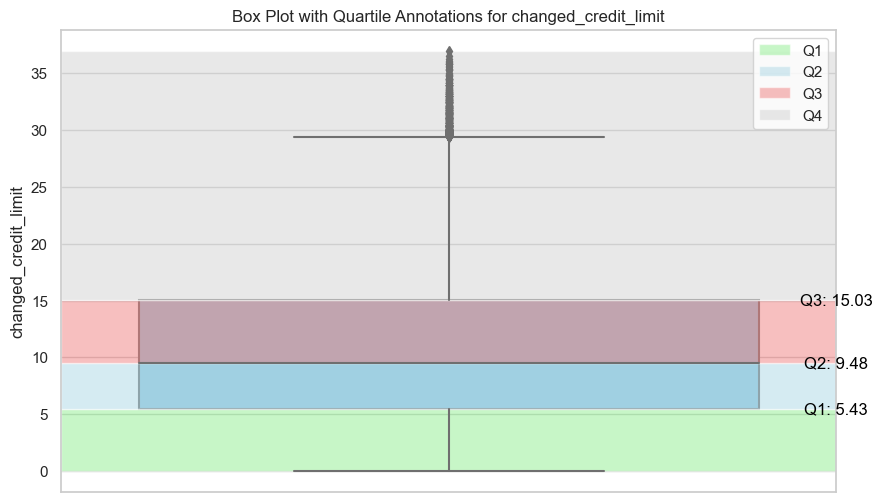

In [168]:
plot_quartile_boxplot(data, 'changed_credit_limit')

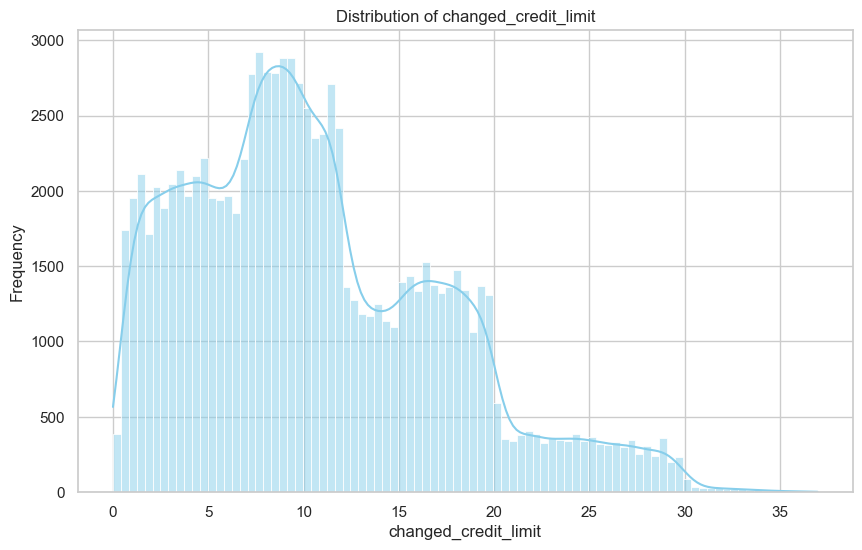

In [169]:
plot_numeric_distribution(data,'changed_credit_limit')

#### 10. Num of Credit Inquiries

- There are 1915 rows with NaN values.
- Replace NaN values with the mode value of the customer's number of credit inquiries corresponding to their customer ID.
- There are 1608 rows that appear to be outliers.
- Replace outlier values with the mode value of the customer's number of credit inquiries corresponding to their customer ID.


In [170]:
data[['num_credit_inquiries']].describe()

,num_credit_inquiries
count,95613.000000
mean,27.844519
std,193.541306
min,0.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,2597.000000


In [171]:
data['num_credit_inquiries'].isnull().sum()

1915

In [172]:
handle_missing_values(data,'num_credit_inquiries')

"Missing values in column 'num_credit_inquiries' handled successfully."

In [173]:
data[['num_credit_inquiries']].isnull().sum()

num_credit_inquiries    0
dtype: int64

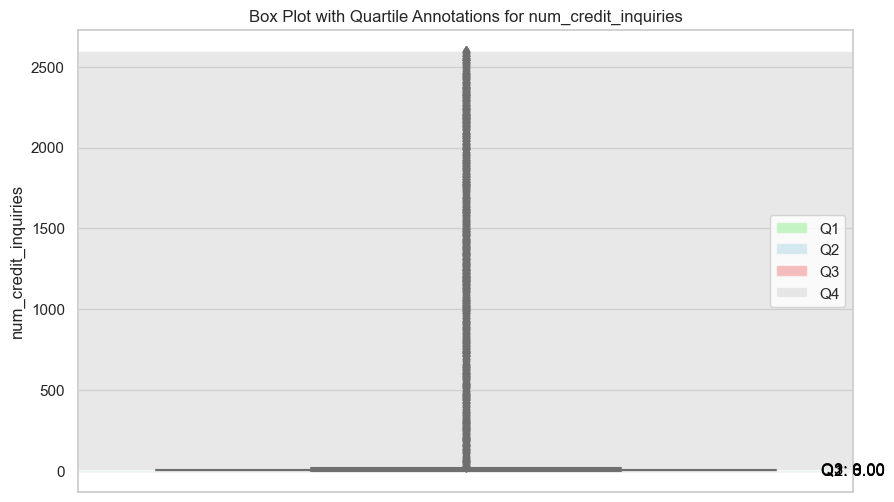

In [174]:
plot_quartile_boxplot(data, 'num_credit_inquiries')

In [175]:
# Detect outlier
outliers_inquiry = detect_outliers(data['num_credit_inquiries'])
# Get the min value of outlier
min_inquiry_outlier = outliers_inquiry.min()
min_inquiry_outlier

26.0

In [176]:
data[data['num_credit_inquiries']>=min_inquiry_outlier][['customer_id','num_credit_inquiries', 'credit_score']]

,customer_id,num_credit_inquiries,credit_score
173,CUS_0xa16e,1050.0,Poor
193,CUS_0xa5f9,1044.0,Standard
198,CUS_0xa5f9,1936.0,Standard
234,CUS_0xb681,568.0,Poor
312,CUS_0x571f,1618.0,Standard
...,...,...,...
99717,CUS_0xadbd,1361.0,Standard
99769,CUS_0xc345,310.0,Standard
99789,CUS_0x62f5,93.0,Good
99800,CUS_0x1232,2209.0,Standard


In [177]:
data[data['customer_id'] == 'CUS_0xa16e'][['customer_id','num_credit_inquiries', 'credit_score']]

,customer_id,num_credit_inquiries,credit_score
168,CUS_0xa16e,6.0,Poor
169,CUS_0xa16e,6.0,Poor
170,CUS_0xa16e,6.0,Poor
171,CUS_0xa16e,6.0,Standard
172,CUS_0xa16e,6.0,Poor
173,CUS_0xa16e,1050.0,Poor
174,CUS_0xa16e,6.0,Poor
175,CUS_0xa16e,6.0,Poor


In [178]:
handle_outlier_values(data,'num_credit_inquiries',min_inquiry_outlier)

"Outliers in column 'num_credit_inquiries' handled successfully."

In [179]:
data[data['customer_id'] == 'CUS_0xa16e'][['customer_id','num_credit_inquiries', 'credit_score']]

,customer_id,num_credit_inquiries,credit_score
168,CUS_0xa16e,6.0,Poor
169,CUS_0xa16e,6.0,Poor
170,CUS_0xa16e,6.0,Poor
171,CUS_0xa16e,6.0,Standard
172,CUS_0xa16e,6.0,Poor
173,CUS_0xa16e,6.0,Poor
174,CUS_0xa16e,6.0,Poor
175,CUS_0xa16e,6.0,Poor


In [180]:
data[['num_credit_inquiries']].describe()

,num_credit_inquiries
count,97528.000000
mean,5.850638
std,3.868181
min,0.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,17.000000


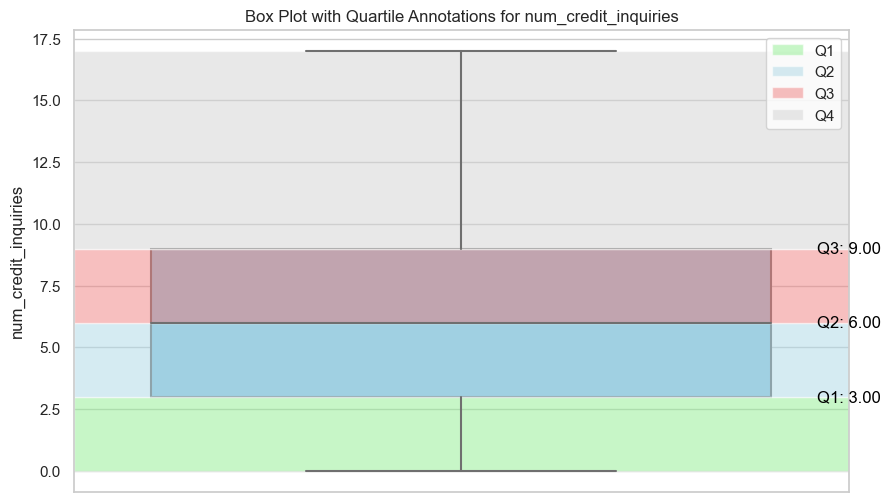

In [181]:
plot_quartile_boxplot(data, 'num_credit_inquiries')

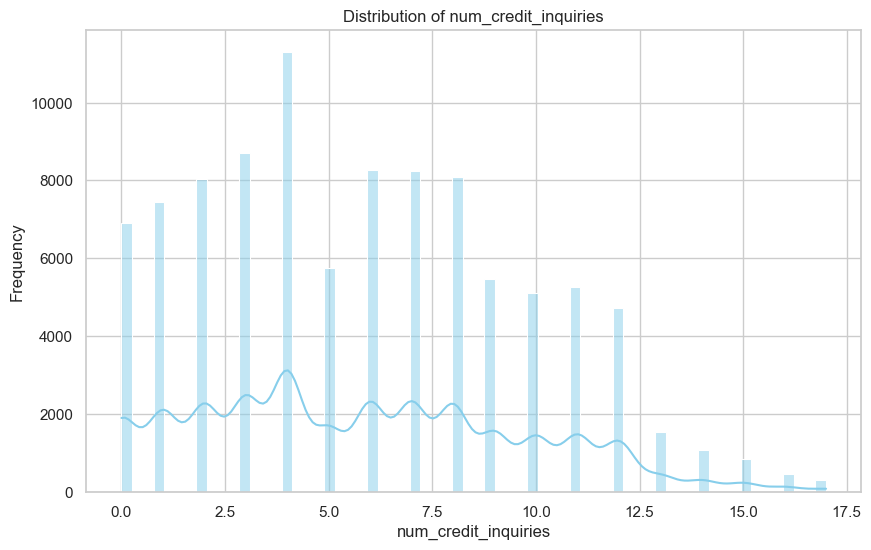

In [182]:
plot_numeric_distribution(data,'num_credit_inquiries')

#### 11. Outstanding Debt

- Convert data type of outstanding debt column from string to float

In [183]:
data[['outstanding_debt']].describe()

,outstanding_debt
count,97528
unique,12864
top,1360.45
freq,24


In [184]:
data[['outstanding_debt']].dtypes

outstanding_debt    object
dtype: object

In [185]:
data['outstanding_debt'] = data['outstanding_debt'].str.extract(r'(\d+\.\d+)').astype(float)
data[['outstanding_debt']].dtypes

outstanding_debt    float64
dtype: object

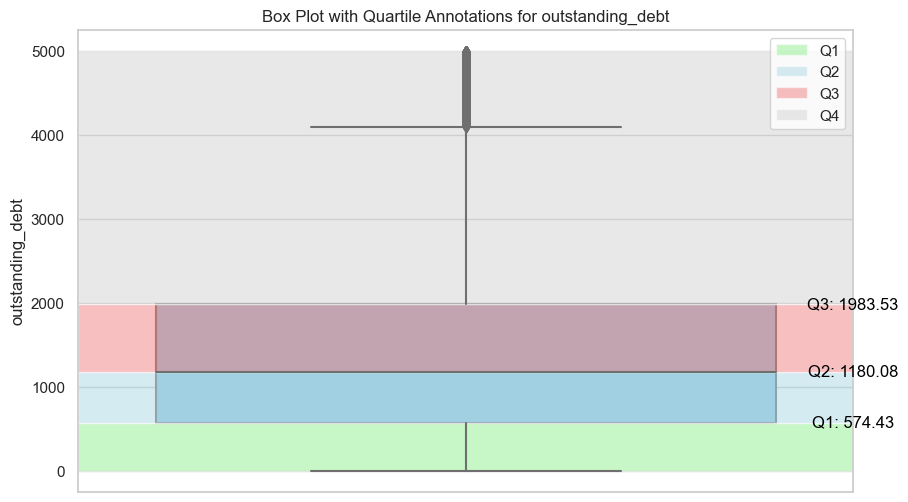

In [186]:
plot_quartile_boxplot(data, 'outstanding_debt')

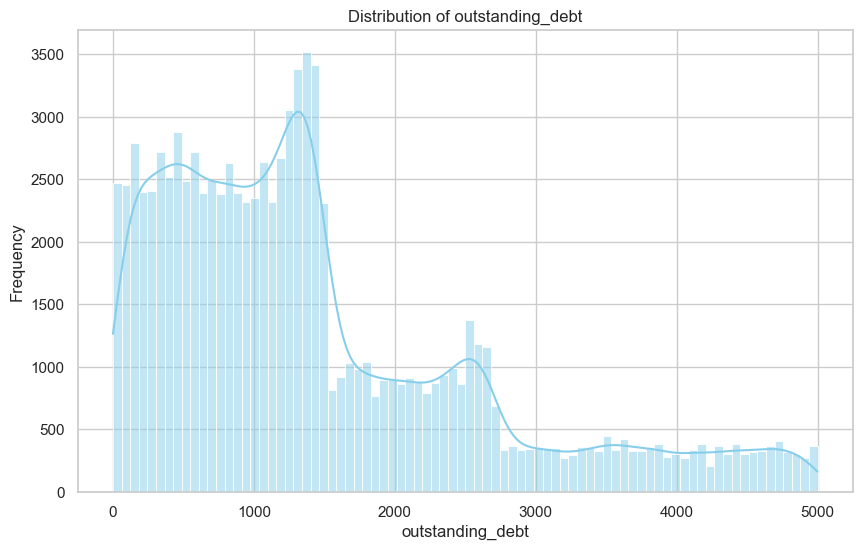

In [187]:
plot_numeric_distribution(data,'outstanding_debt')

#### 12. Credit Utilization Ratio

- No cleaning is needed in this column.


In [188]:
data[['credit_utilization_ratio']]

,credit_utilization_ratio
0,26.822620
1,31.944960
2,28.609352
3,31.377862
4,24.797347
...,...
99995,34.663572
99996,40.565631
99997,41.255522
99998,33.638208


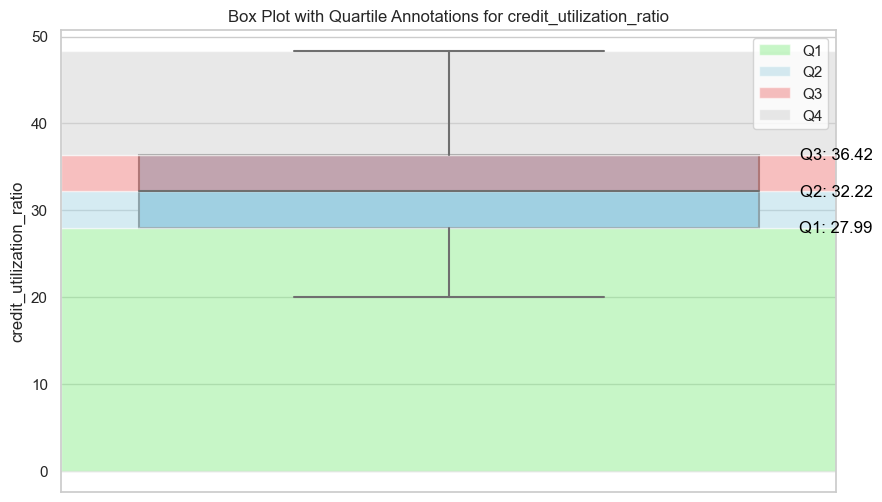

In [189]:
plot_quartile_boxplot(data, 'credit_utilization_ratio')

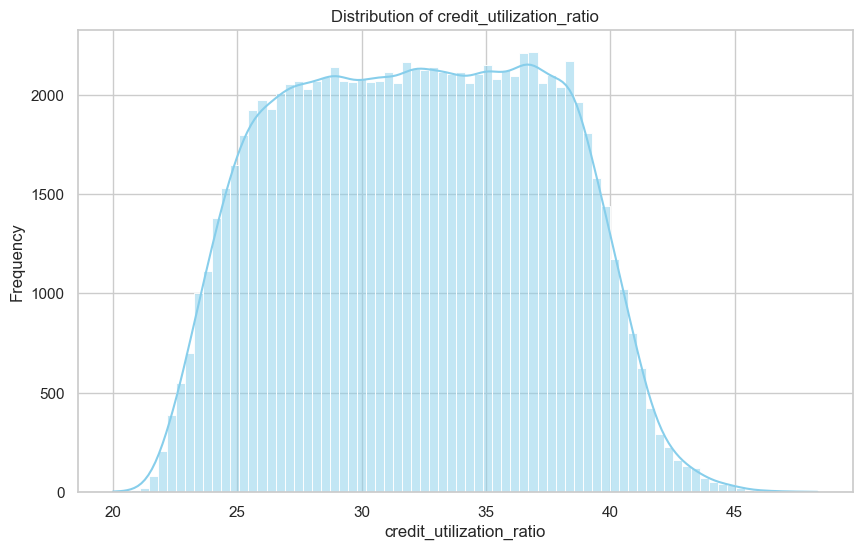

In [190]:
plot_numeric_distribution(data,'credit_utilization_ratio')

#### 13. Total EMI per Month (Equated Monthly Instalment)

- There are 6729 rows that appear to be outliers.
- Replace outlier values with the mode value of the customer's total EMI per month corresponding to their customer ID.
- Remaining outliers are replaced by the mean value of the customer's total EMI per month.


In [191]:
data[['total_emi_per_month']].describe()

,total_emi_per_month
count,97528.000000
mean,1396.281103
std,8286.963556
min,0.000000
25%,30.079707
50%,67.817424
75%,155.441868
max,82331.000000


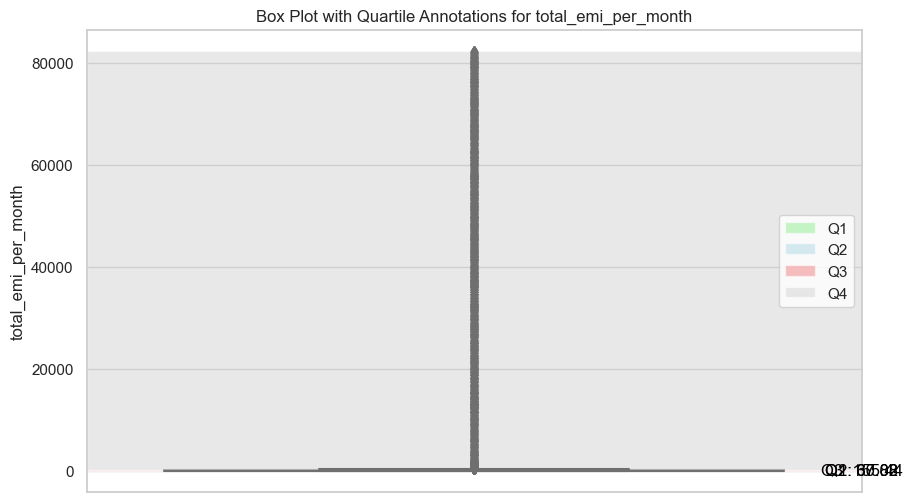

In [192]:
plot_quartile_boxplot(data, 'total_emi_per_month')

In [193]:
# Detect outlier
outliers_EMI = detect_outliers(data['total_emi_per_month'])
# Get the min value of outlier
min_EMI_outlier = outliers_EMI.min()
min_EMI_outlier

343.788951173702

In [194]:
data[data['total_emi_per_month']>=min_EMI_outlier][['customer_id','total_emi_per_month', 'credit_score']]

,customer_id,total_emi_per_month,credit_score
40,CUS_0x95ee,15015.000000,Good
45,CUS_0x95ee,15515.000000,Good
50,CUS_0x284a,911.220179,Good
51,CUS_0x284a,23834.000000,Good
52,CUS_0x284a,32662.000000,Good
...,...,...,...
99959,CUS_0x2084,362.072453,Standard
99960,CUS_0x372c,50894.000000,Good
99970,CUS_0xf16,75011.000000,Good
99985,CUS_0x8600,12112.000000,Poor


In [195]:
data[data['customer_id'] == 'CUS_0x95ee'][['customer_id','total_emi_per_month', 'credit_score']]

,customer_id,total_emi_per_month,credit_score
40,CUS_0x95ee,15015.0,Good
41,CUS_0x95ee,0.0,Good
42,CUS_0x95ee,0.0,Good
43,CUS_0x95ee,0.0,Good
44,CUS_0x95ee,0.0,Good
45,CUS_0x95ee,15515.0,Good
46,CUS_0x95ee,0.0,Standard
47,CUS_0x95ee,0.0,Good


In [196]:
handle_outlier_values(data,'total_emi_per_month',min_EMI_outlier)

"Outliers in column 'total_emi_per_month' handled successfully."

In [197]:
data[data['customer_id'] == 'CUS_0x95ee'][['customer_id','total_emi_per_month', 'credit_score']]

,customer_id,total_emi_per_month,credit_score
40,CUS_0x95ee,0.0,Good
41,CUS_0x95ee,0.0,Good
42,CUS_0x95ee,0.0,Good
43,CUS_0x95ee,0.0,Good
44,CUS_0x95ee,0.0,Good
45,CUS_0x95ee,0.0,Good
46,CUS_0x95ee,0.0,Standard
47,CUS_0x95ee,0.0,Good


In [198]:
mean_emi = int(np.mean(data.loc[data['total_emi_per_month'] < min_EMI_outlier, 'total_emi_per_month']))
data.loc[data['total_emi_per_month'] >= min_EMI_outlier, 'total_emi_per_month'] = mean_emi

In [199]:
data[['total_emi_per_month']].describe()

,total_emi_per_month
count,97528.000000
mean,87.706302
std,78.998157
min,0.000000
25%,28.612101
50%,64.350195
75%,127.617609
max,343.302295


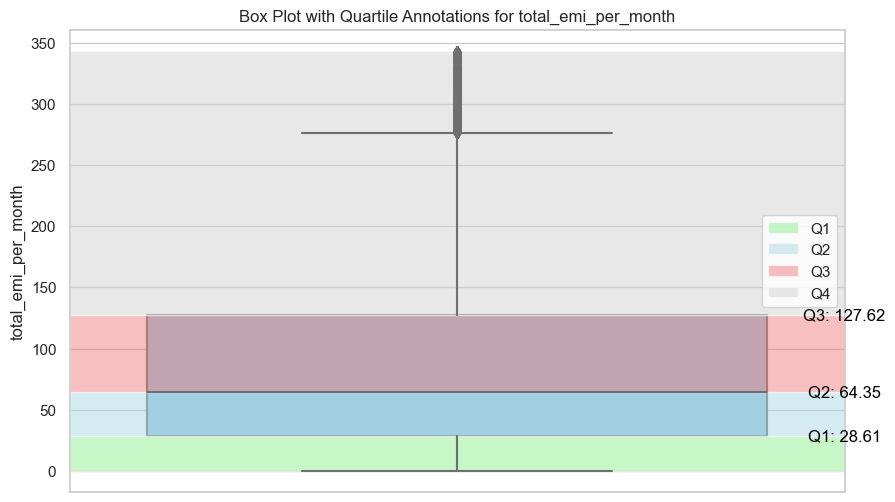

In [200]:
plot_quartile_boxplot(data, 'total_emi_per_month')

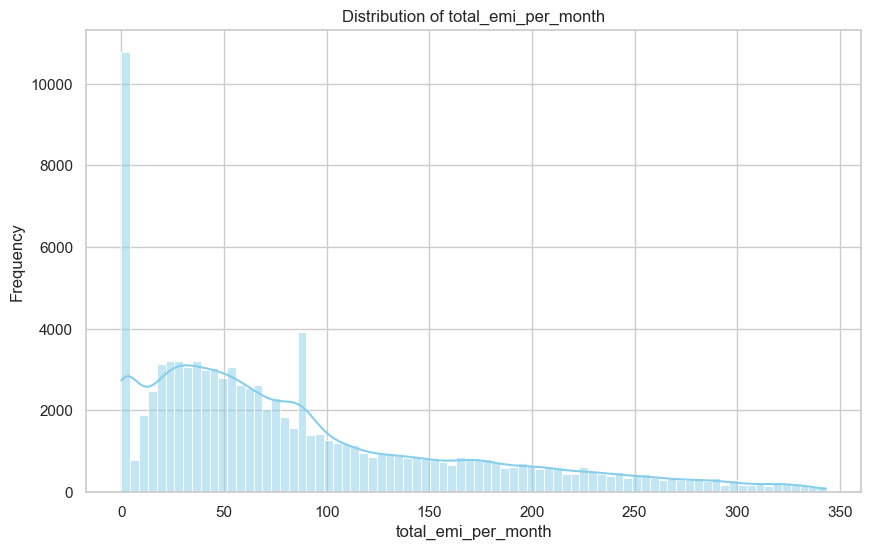

In [201]:
plot_numeric_distribution(data,'total_emi_per_month')

#### 14. Amount Invested Monthly

- Convert the data type of the amount invested monthly column from string to float.
- There are 8557 rows with NaN values.
- Replace NaN values with the mode value of the customer's amount invested monthly corresponding to their customer ID.


In [202]:
data[['amount_invested_monthly']].describe()

,amount_invested_monthly
count,93171
unique,88804
top,__10000__
freq,4200


In [203]:
data[['amount_invested_monthly']].dtypes

amount_invested_monthly    object
dtype: object

In [204]:
data['amount_invested_monthly'] = data['amount_invested_monthly'].str.extract(r'(\d+\.\d+)').astype(float)
data[['amount_invested_monthly']].dtypes

amount_invested_monthly    float64
dtype: object

In [205]:
data['amount_invested_monthly'].isnull().sum()

8557

In [206]:
handle_missing_values(data,'amount_invested_monthly')

"Missing values in column 'amount_invested_monthly' handled successfully."

In [207]:
data['amount_invested_monthly'].isnull().sum()

0

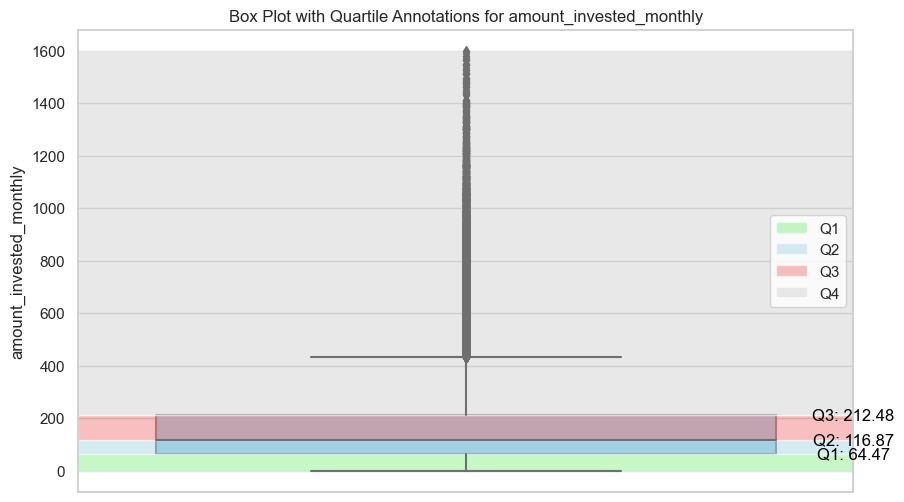

In [208]:
plot_quartile_boxplot(data, 'amount_invested_monthly')

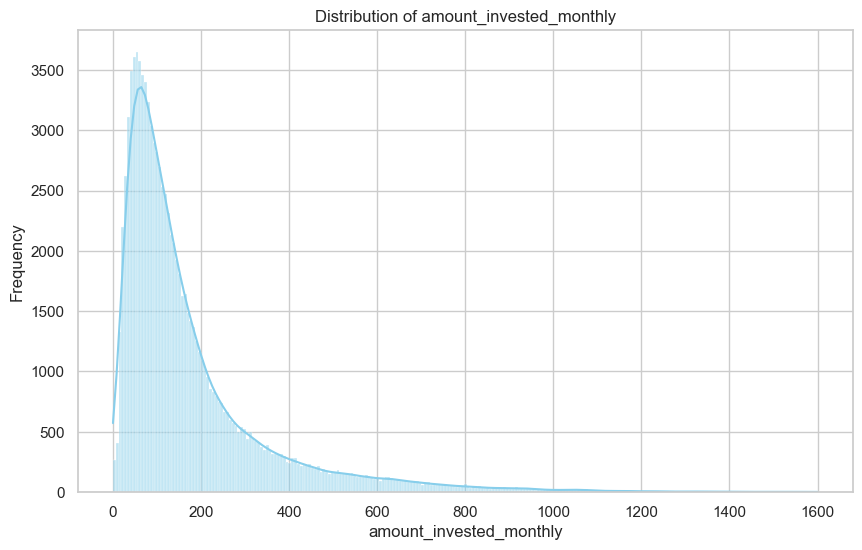

In [209]:
plot_numeric_distribution(data,'amount_invested_monthly')

#### 15. Monthly Balance

- Convert the data type of monthly balance from string to float.
- There are 8557 rows with NaN values.
- Replace NaN values with the mode value of the customer's monthly balance corresponding to their customer ID.
- Drop remaining NaN values.


In [210]:
data[['monthly_balance']].describe()

,monthly_balance
count,96430
unique,96422
top,__-333333333333333333333333333__
freq,9


In [211]:
data[['monthly_balance']].dtypes

monthly_balance    object
dtype: object

In [212]:
data['monthly_balance'] = data['monthly_balance'].str.extract(r'(\d+\.\d+)').astype(float)
data[['monthly_balance']].dtypes

monthly_balance    float64
dtype: object

In [213]:
data['monthly_balance'].isnull().sum()

2735

In [214]:
handle_missing_values(data,'monthly_balance')

"Missing values in column 'monthly_balance' handled successfully."

In [215]:
data['monthly_balance'].isnull().sum()

1656

In [216]:
data.drop(data[data['monthly_balance'].isnull()].index, inplace=True)

In [217]:
data['monthly_balance'].isnull().sum()

0

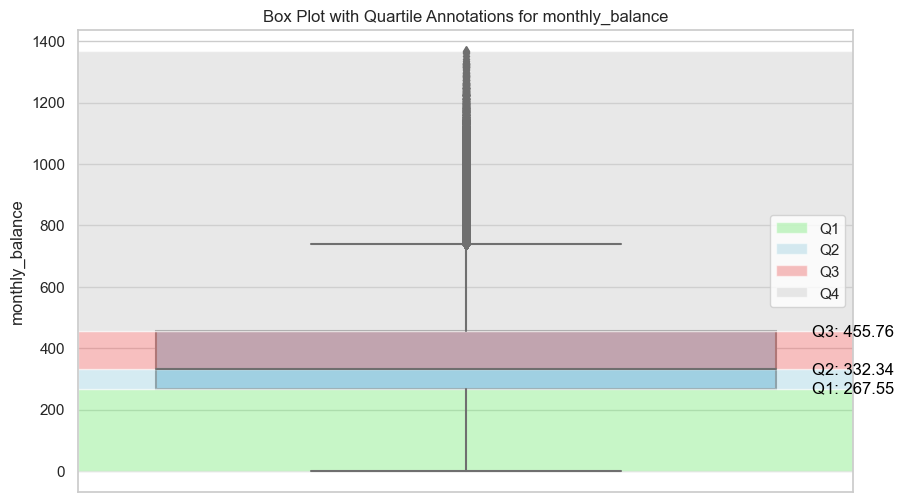

In [218]:
plot_quartile_boxplot(data, 'monthly_balance')

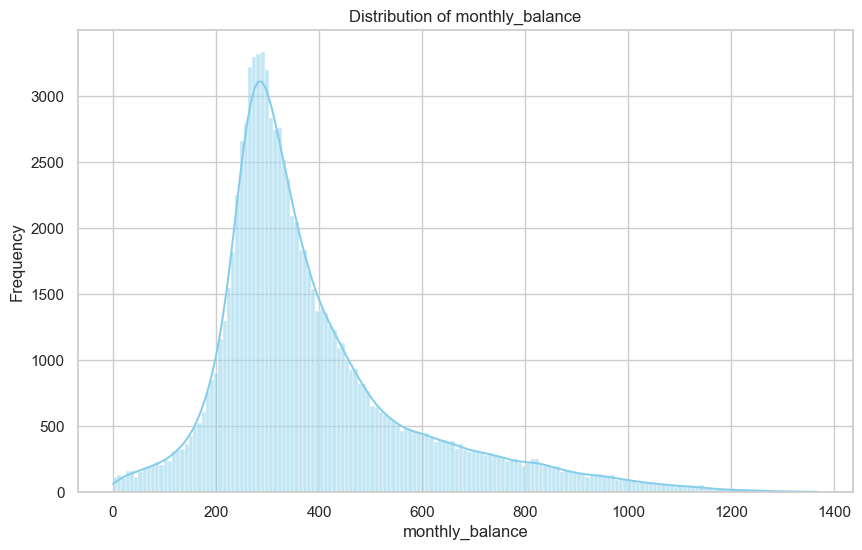

In [219]:
plot_numeric_distribution(data,'monthly_balance')

#### 15. Number of Delayed Payment

- Convert the data type of the number of delayed payment column from string to float.
- There are 6839 rows with NaN values.
- Replace NaN values with the mode value of the customer's number of delayed payment corresponding to their customer ID.
- There are 716 rows that appear to be outliers.
- Replace outlier values with the mode value of the customer's number of delayed payment corresponding to their customer ID.


In [220]:
data[['num_of_delayed_payment']].describe()

,num_of_delayed_payment
count,89180
unique,717
top,19
freq,5188


In [221]:
data['num_of_delayed_payment'].dtypes

dtype('O')

In [222]:
data['num_of_delayed_payment'] = data['num_of_delayed_payment'].str.extract('(\d+)').astype(float)
data['num_of_delayed_payment'].dtypes

dtype('float64')

In [223]:
data['num_of_delayed_payment'].isnull().sum()

6692

In [224]:
handle_missing_values(data,'num_of_delayed_payment')

"Missing values in column 'num_of_delayed_payment' handled successfully."

In [225]:
data[['num_of_delayed_payment']].isnull().sum()

num_of_delayed_payment    0
dtype: int64

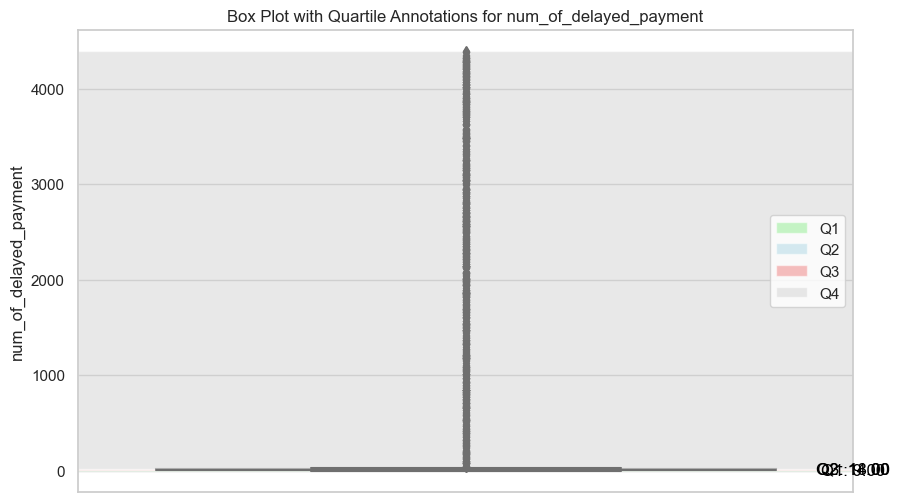

In [226]:
plot_quartile_boxplot(data, 'num_of_delayed_payment')

In [227]:
# Detect outlier
outliers_delay = detect_outliers(data['num_of_delayed_payment'])
# Get the min value of outlier
min_delay_outlier = outliers_delay.min()
min_delay_outlier

46.0

In [228]:
data[data['num_of_delayed_payment']>=min_delay_outlier][['customer_id','num_of_delayed_payment', 'credit_score']]

,customer_id,num_of_delayed_payment,credit_score
252,CUS_0x6048,3318.0,Poor
284,CUS_0x9b94,3083.0,Good
304,CUS_0x42ac,1338.0,Poor
409,CUS_0xb986,3104.0,Poor
643,CUS_0x78e0,183.0,Standard
...,...,...,...
97973,CUS_0x50f7,3707.0,Poor
97984,CUS_0xa3f4,4292.0,Standard
98007,CUS_0x215f,1820.0,Standard
98148,CUS_0x85cb,145.0,Poor


In [229]:
data[data['customer_id'] == 'CUS_0x6048'][['customer_id','num_of_delayed_payment', 'credit_score']]

,customer_id,num_of_delayed_payment,credit_score
248,CUS_0x6048,21.0,Poor
249,CUS_0x6048,21.0,Poor
250,CUS_0x6048,21.0,Poor
251,CUS_0x6048,22.0,Standard
252,CUS_0x6048,3318.0,Poor
253,CUS_0x6048,21.0,Poor
254,CUS_0x6048,21.0,Poor
255,CUS_0x6048,18.0,Poor


In [230]:
handle_outlier_values(data,'num_of_delayed_payment',min_delay_outlier)

"Outliers in column 'num_of_delayed_payment' handled successfully."

In [231]:
data[data['customer_id'] == 'CUS_0x6048'][['customer_id','num_of_delayed_payment', 'credit_score']]

,customer_id,num_of_delayed_payment,credit_score
248,CUS_0x6048,21.0,Poor
249,CUS_0x6048,21.0,Poor
250,CUS_0x6048,21.0,Poor
251,CUS_0x6048,22.0,Standard
252,CUS_0x6048,21.0,Poor
253,CUS_0x6048,21.0,Poor
254,CUS_0x6048,21.0,Poor
255,CUS_0x6048,18.0,Poor


In [232]:
data[['num_of_delayed_payment']].describe()

,num_of_delayed_payment
count,95872.000000
mean,13.507646
std,6.206582
min,0.000000
25%,9.000000
50%,14.000000
75%,18.000000
max,28.000000


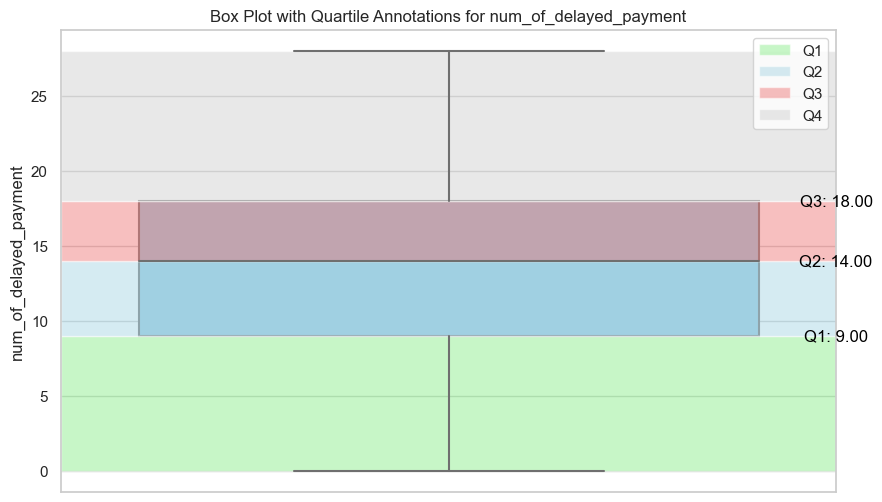

In [233]:
plot_quartile_boxplot(data, 'num_of_delayed_payment')

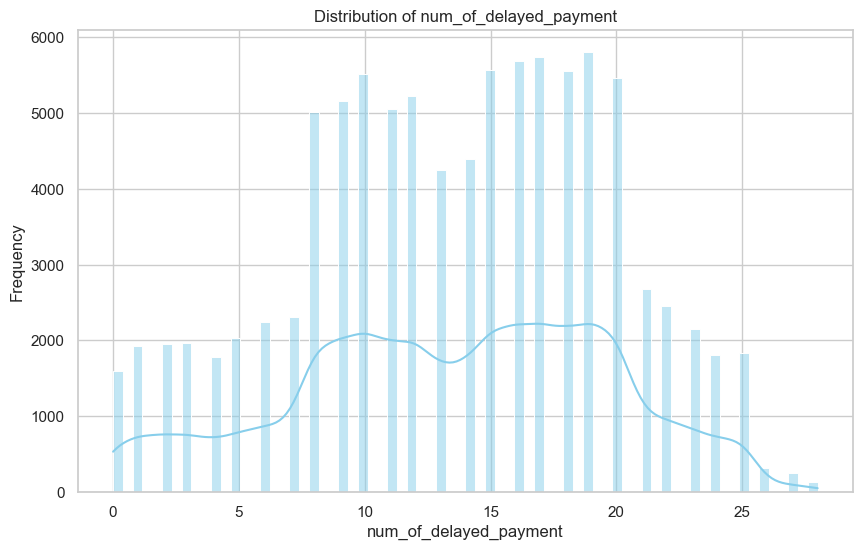

In [234]:
plot_numeric_distribution(data,'num_of_delayed_payment')

#### 16. Credit History Age

- Convert the month format and data type of the credit history age column from object to float.
- There are 8830 rows with NaN values.
- Replace NaN values with the mode value of the customer's credit history age corresponding to their customer ID.


In [235]:
data[['credit_history_age']].describe()

,credit_history_age
count,87206
unique,404
top,19 Years and 4 Months
freq,428


In [236]:
data['credit_history_age'].dtypes

dtype('O')

In [237]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val
        
data['credit_history_age'] = data['credit_history_age'].apply(lambda x: Month_Converter(x)).astype(float)
data['credit_history_age'].dtypes

dtype('float64')

In [238]:
data['credit_history_age'].isnull().sum()

8666

In [239]:
handle_missing_values(data, 'credit_history_age')

"Missing values in column 'credit_history_age' handled successfully."

In [240]:
data['credit_history_age'].isnull().sum()

0

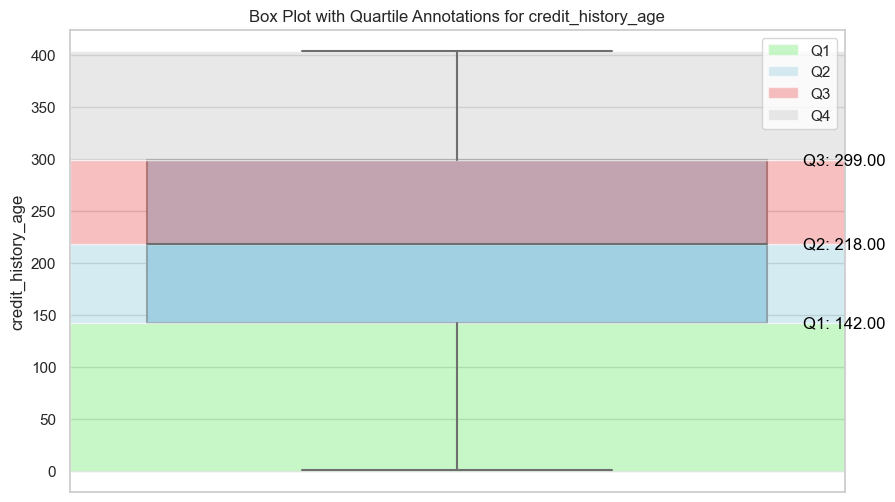

In [241]:
plot_quartile_boxplot(data, 'credit_history_age')

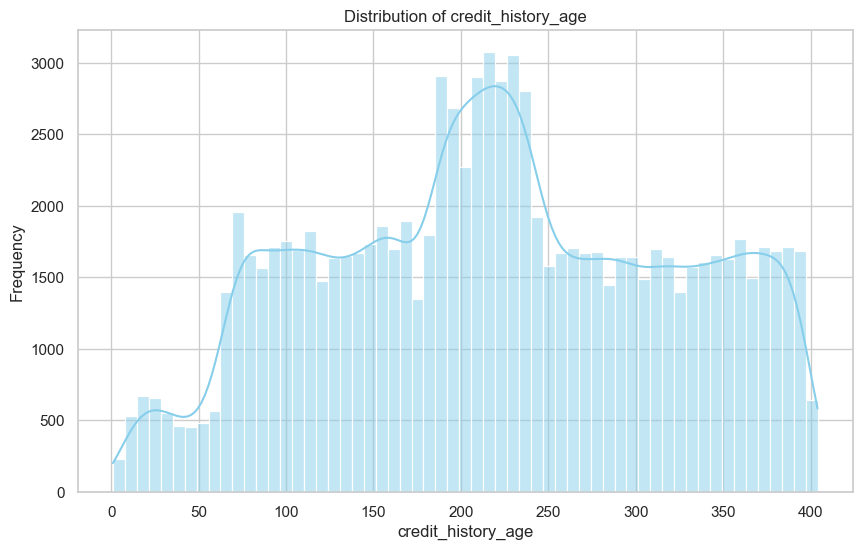

In [242]:
plot_numeric_distribution(data,'credit_history_age')

## 2. Data Preparation

In [243]:
# Convert categorical data to numerical representative
data["credit_score"] = data["credit_score"].map({"Poor": 0, 
                               "Standard": 1, 
                               "Good": 2})

data["credit_mix"] = data["credit_mix"].map({"Not Specified": 0, 
                               "Bad": 1, 
                               "Standard": 2,
                               "Good":3})

In [244]:
# Splitting the data into features (X) and labels (y)
X = data.drop(columns=['id', 'customer_id','month', 'name', 'age','ssn','type_of_loan','occupation','credit_score','payment_of_min_amount','payment_behaviour'])
y = data['credit_score']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [245]:
X

,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_cards,interest_rate,num_of_loans,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
0,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,0,809.98,26.822620,265.0,49.574949,80.415295,312.494089
1,19114.12,1824.843333,3,4,3,4,1,4.0,11.27,4.0,3,809.98,31.944960,265.0,49.574949,118.280222,284.629162
2,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,3,809.98,28.609352,267.0,49.574949,81.699521,331.209863
3,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,3,809.98,31.377862,268.0,49.574949,199.458074,223.451310
4,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,3,809.98,24.797347,269.0,49.574949,41.420153,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98299,41015.55,3152.962500,0,4,4,1,9,1.0,1.58,2.0,3,599.40,31.936092,302.0,25.671257,387.541439,192.083554
98300,41015.55,3152.962500,0,4,4,1,9,1.0,1.58,2.0,3,599.40,26.268474,303.0,25.671257,76.057218,453.567775
98301,41015.55,3152.962500,0,4,4,1,9,1.0,1.58,2.0,3,599.40,28.754729,299.0,25.671257,91.198586,448.426407
98302,41015.55,3152.962500,0,4,4,1,9,3.0,2.58,2.0,3,599.40,38.514974,305.0,25.671257,205.830993,343.794000


In [246]:
y

0        2
1        2
2        2
3        2
4        2
        ..
98299    1
98300    1
98301    1
98302    1
98303    1
Name: credit_score, Length: 95872, dtype: int64

## 3. Data Balancing

In [247]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data

,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_cards,interest_rate,num_of_loans,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score
25932,15035.190,1214.932500,9,5,16,5,61,20.0,4.98,12.0,1,1447.52,28.773801,152.0,39.949693,65.380726,286.162831,0
52639,19577.155,1659.429583,3,2,1,2,3,6.0,3.94,4.0,0,1140.51,39.040774,209.0,20.760294,109.051462,326.131202,2
53574,29374.770,2377.897500,3,7,6,2,23,11.0,16.65,7.0,2,1189.37,26.524408,236.0,40.264074,140.016730,327.508946,0
6428,39460.010,3030.334167,2,6,2,4,10,7.0,1.50,2.0,3,1180.08,36.303271,359.0,82.451420,180.738927,309.843070,1
66593,18124.175,1683.347917,6,5,11,3,7,16.0,11.87,3.0,3,335.05,24.469181,296.0,31.989156,189.419067,236.926568,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72856,57857.100,4812.425000,4,8,30,3,22,7.0,11.80,8.0,2,2019.49,26.771309,107.0,85.773114,158.211991,517.257395,1
6202,86290.140,7381.845000,4,3,8,3,24,5.0,4.53,0.0,2,841.82,26.038923,245.0,173.947597,443.511733,380.725170,1
15081,15985.410,1372.117500,7,3,17,7,22,16.0,14.86,9.0,0,1325.27,33.106344,220.0,64.126794,160.745048,202.339908,0
14164,7059.455,614.287917,7,7,32,5,48,19.0,1.21,7.0,1,4540.76,36.473555,75.0,17.857117,62.422665,271.149010,0


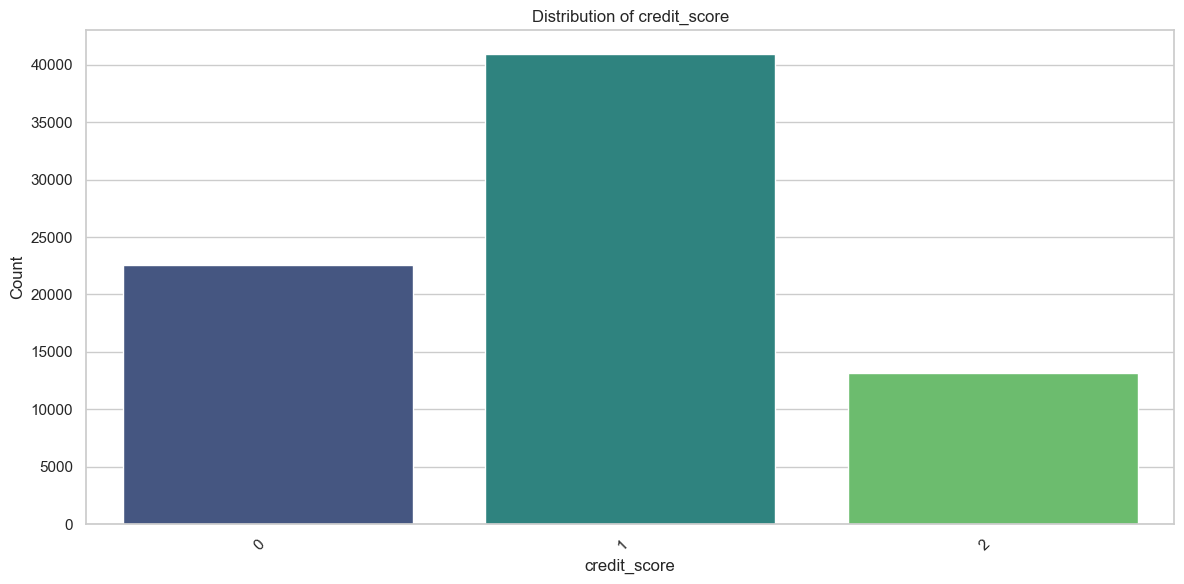

In [248]:
plot_category_distribution(train_data, 'credit_score')

In [249]:
# Creating an instance of RandomUnderSampler
smote = SMOTE(random_state=42)

# Balancing the training data using RandomUnderSampler
X_train, y_train = smote.fit_resample(X_train, y_train)

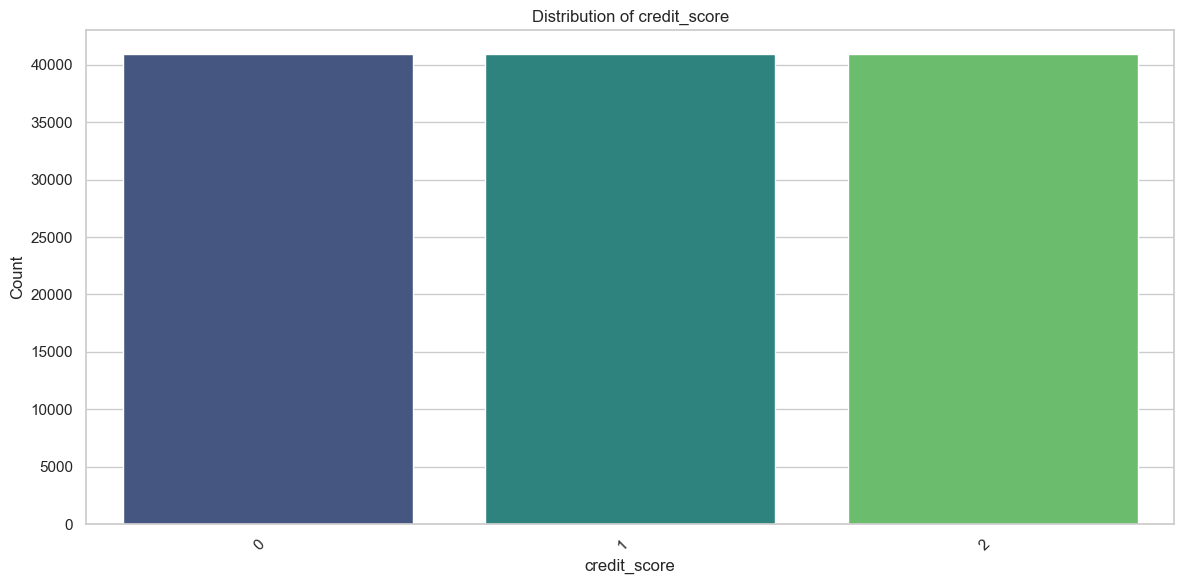

In [250]:
train_data = pd.concat([X_train, y_train], axis=1)
plot_category_distribution(train_data, 'credit_score')

## 4. Feature Importance

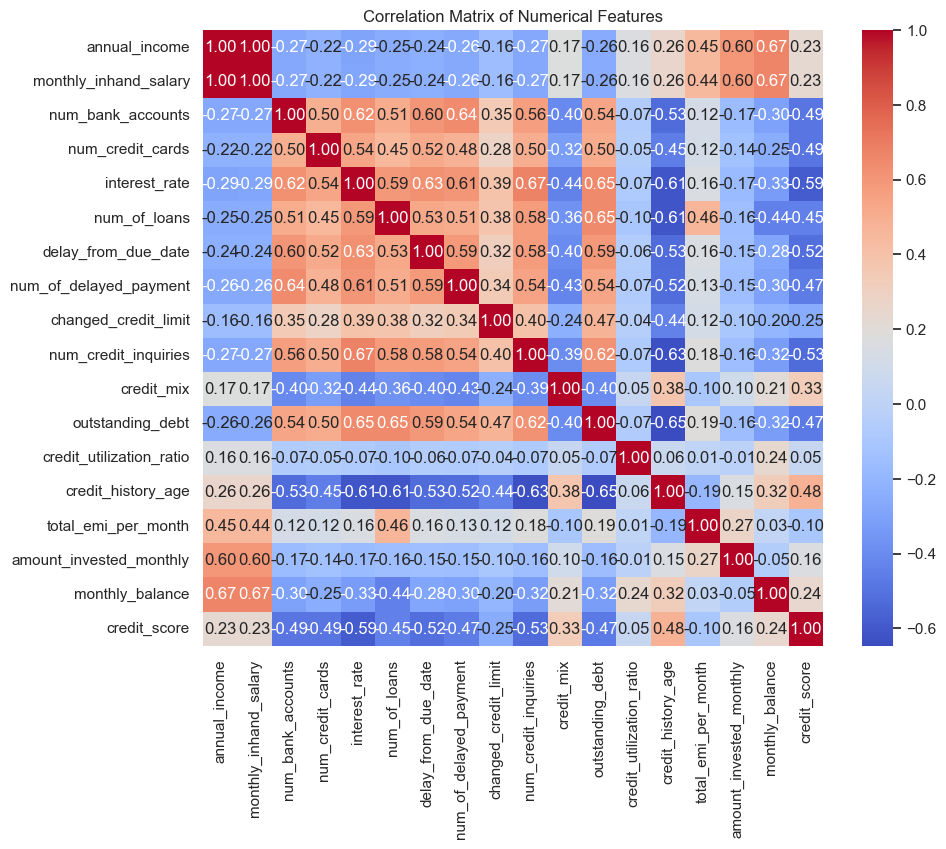

In [251]:
train_data = pd.concat([X_train, y_train], axis=1)

# Select only numerical columns
numerical_data = train_data.select_dtypes(include=['float64', 'int64', 'int32'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

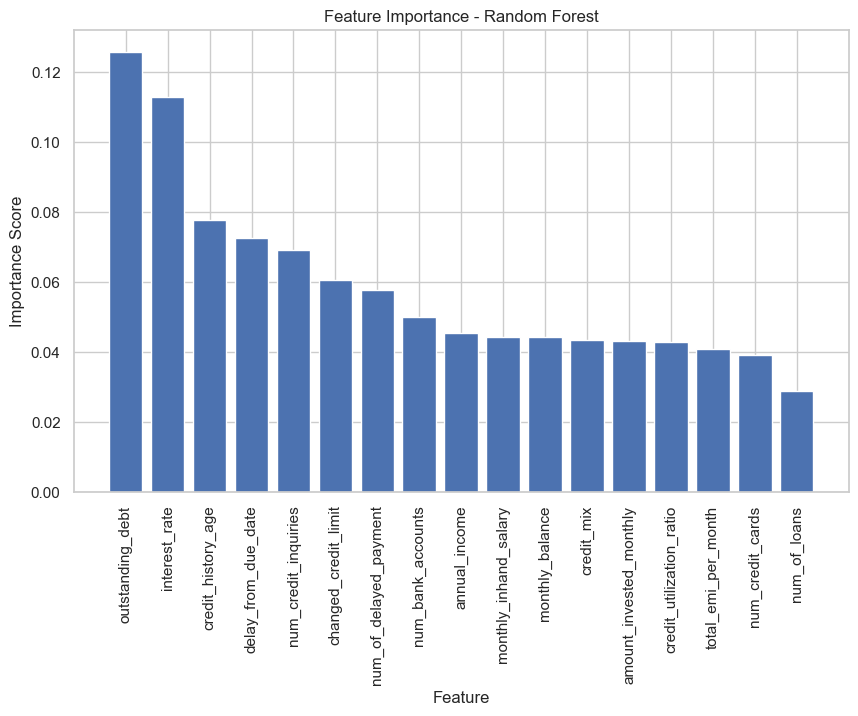

In [252]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.show()

In [253]:
X_train = X_train.drop(columns=['monthly_inhand_salary','total_emi_per_month','changed_credit_limit','num_credit_inquiries','credit_utilization_ratio','amount_invested_monthly'])
X_test = X_test.drop(columns=['monthly_inhand_salary','total_emi_per_month','changed_credit_limit','num_credit_inquiries','credit_utilization_ratio','amount_invested_monthly'])

In [254]:
X_train

,annual_income,num_bank_accounts,num_credit_cards,interest_rate,num_of_loans,delay_from_due_date,num_of_delayed_payment,credit_mix,outstanding_debt,credit_history_age,monthly_balance
0,15035.190000,9,5,16,5,61,20.000000,1,1447.520000,152.000000,286.162831
1,19577.155000,3,2,1,2,3,6.000000,0,1140.510000,209.000000,326.131202
2,29374.770000,3,7,6,2,23,11.000000,2,1189.370000,236.000000,327.508946
3,39460.010000,2,6,2,4,10,7.000000,3,1180.080000,359.000000,309.843070
4,18124.175000,6,5,11,3,7,16.000000,3,335.050000,296.000000,236.926568
...,...,...,...,...,...,...,...,...,...,...,...
122851,42989.667038,4,3,2,0,9,8.416713,3,584.277684,250.415034,509.655534
122852,119612.280000,3,1,3,0,13,9.000000,3,1274.050000,229.616667,1103.792136
122853,40091.380047,4,3,4,2,11,4.267894,1,1024.954621,276.106330,304.734201
122854,74913.760000,2,4,5,3,13,4.721576,3,558.210000,204.164729,360.349065


In [255]:
X_test

,annual_income,num_bank_accounts,num_credit_cards,interest_rate,num_of_loans,delay_from_due_date,num_of_delayed_payment,credit_mix,outstanding_debt,credit_history_age,monthly_balance
3601,76257.520,7,9,24,9,48,16.0,1,2828.24,72.0,190.410890
21119,9290.250,6,7,32,9,24,19.0,1,1633.87,180.0,260.188950
3879,11731.585,8,3,6,2,18,10.0,0,289.73,230.0,314.725665
72738,50155.740,4,7,18,6,20,19.0,2,2358.09,160.0,217.729326
54913,86418.720,1,3,6,3,5,9.0,3,487.21,341.0,709.585463
...,...,...,...,...,...,...,...,...,...,...,...
71746,50818.830,6,5,20,6,15,24.0,1,1528.92,221.0,340.467084
63244,73665.330,8,4,6,1,18,18.0,2,794.92,228.0,577.478896
63296,40735.300,9,7,26,3,27,16.0,0,1774.12,133.0,385.504073
45249,93256.680,5,7,19,1,25,18.0,2,1125.67,218.0,879.399831


## 5. Feature Scaling

In [256]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test = scaler.transform(X_test)


In [257]:
X_train

array([[0.0552803 , 0.81818182, 0.45454545, ..., 0.2895831 , 0.37468983,
        0.21001684],
       [0.08655108, 0.27272727, 0.18181818, ..., 0.22815456, 0.51612903,
        0.23935898],
       [0.15400625, 0.27272727, 0.63636364, ..., 0.23793079, 0.58312655,
        0.24037043],
       ...,
       [0.22778858, 0.36363636, 0.27272727, ..., 0.2050335 , 0.68264598,
        0.22365071],
       [0.46753566, 0.18181818, 0.36363636, ..., 0.11164423, 0.50413084,
        0.26447948],
       [0.06623452, 0.        , 0.18181818, ..., 0.22270221, 0.66070434,
        0.22930444]])

In [258]:
X_test

array([[0.47678726, 0.63636364, 0.81818182, ..., 0.56584645, 0.17617866,
        0.13972207],
       [0.01572722, 0.54545455, 0.63636364, ..., 0.32686921, 0.44416873,
        0.19094852],
       [0.03253546, 0.72727273, 0.27272727, ..., 0.05792502, 0.56823821,
        0.23098579],
       ...,
       [0.23222187, 0.81818182, 0.63636364, ..., 0.35493133, 0.32754342,
        0.28294663],
       [0.59382404, 0.45454545, 0.63636364, ..., 0.22518528, 0.53846154,
        0.64553237],
       [0.19573564, 0.27272727, 0.09090909, ..., 0.29148592, 0.5955335 ,
        0.30142909]])

# IV. Modeling 

## 1. RandomForestClassifier

In [259]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10)

In [260]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_split=10)

In [261]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

In [262]:
# Check True Value vs Predicted Value on Test Set
classification_data = pd.DataFrame(zip(y_test, y_pred_rf),columns=['True Value','Predicted Value'])
classification_data

,True Value,Predicted Value
0,0,0
1,0,1
2,1,1
3,1,1
4,2,2
...,...,...
19170,0,0
19171,1,1
19172,0,0
19173,1,1


In [263]:
# Check the test score and train score for the model
test_score = rf_classifier.score(X_test, y_test)
train_score = rf_classifier.score(X_train, y_train)

print(f'The RandomForestClassifier model test score is {test_score * 100:.2f}%')
print(f'The RandomForestClassifier model train score is {train_score * 100:.2f}%')

The RandomForestClassifier model test score is 79.54%
The RandomForestClassifier model train score is 93.95%


> #### Evaluation


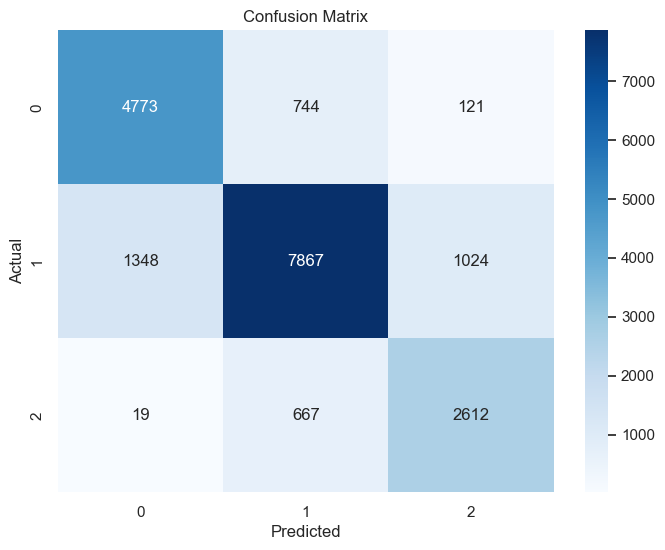

In [264]:
# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [265]:
# Print the formatted classification report
class_report = classification_report(y_test, y_pred_rf)
print("\tRandomForestClassifier Classification Report:\n\n", class_report)

	RandomForestClassifier Classification Report:

               precision    recall  f1-score   support

           0       0.78      0.85      0.81      5638
           1       0.85      0.77      0.81     10239
           2       0.70      0.79      0.74      3298

    accuracy                           0.80     19175
   macro avg       0.77      0.80      0.79     19175
weighted avg       0.80      0.80      0.80     19175



### 2. DecisionTreeClassifier

In [266]:
# Create an instance of the decisionTree classifier
d_classifier = DecisionTreeClassifier(random_state=42, max_depth=100, min_samples_split=10, min_samples_leaf=8)

In [267]:
# Train the classifier
d_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100, min_samples_leaf=8, min_samples_split=10,
                       random_state=42)

In [268]:
# Make predictions on the test set
y_pred_d = d_classifier.predict(X_test)

In [269]:
# Check True Value vs Predicted Value on Test Set
classification_data = pd.DataFrame(zip(y_test, y_pred_d),columns=['True Value','Predicted Value'])
classification_data

,True Value,Predicted Value
0,0,1
1,0,1
2,1,1
3,1,0
4,2,2
...,...,...
19170,0,0
19171,1,1
19172,0,0
19173,1,1


In [270]:
# Check the test score and train score for the model
test_score = d_classifier.score(X_test, y_test)
train_score = d_classifier.score(X_train, y_train)

print(f'The DecisionTree model test score is {test_score * 100:.2f}%')
print(f'The DecisionTree model train score is {train_score * 100:.2f}%')

The DecisionTree model test score is 72.43%
The DecisionTree model train score is 86.41%


> #### Evaluation

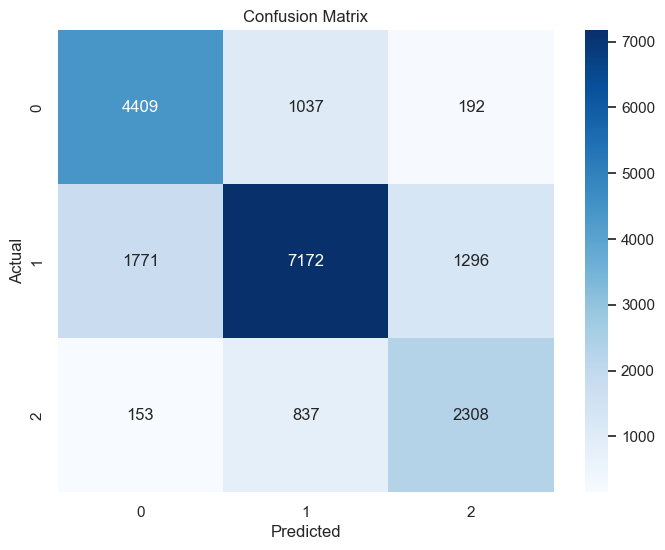

In [271]:
# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred_d)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [272]:
# Print the formatted classification report
class_report = classification_report(y_test, y_pred_d)
print("\tDecisionTreeClassifier Classification Report:\n\n", class_report)

	DecisionTreeClassifier Classification Report:

               precision    recall  f1-score   support

           0       0.70      0.78      0.74      5638
           1       0.79      0.70      0.74     10239
           2       0.61      0.70      0.65      3298

    accuracy                           0.72     19175
   macro avg       0.70      0.73      0.71     19175
weighted avg       0.73      0.72      0.73     19175



## 3. LogisticRegression

In [273]:
# Create an instance of the Logistic Regression classifier
l_classifier = LogisticRegression(max_iter=1000, random_state=42, penalty='l2', C=1.0, solver='lbfgs')

In [274]:
# Train the classifier
l_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [275]:
# Make predictions on the test set
y_pred_l = l_classifier.predict(X_test)

In [276]:
# Check True Value vs Predicted Value on Test Set
classification_data = pd.DataFrame(zip(y_test, y_pred_l),columns=['True Value','Predicted Value'])
classification_data

,True Value,Predicted Value
0,0,0
1,0,0
2,1,1
3,1,0
4,2,2
...,...,...
19170,0,1
19171,1,1
19172,0,0
19173,1,1


In [277]:
# Check the test score and train score for the model
test_score = l_classifier.score(X_test, y_test)
train_score = l_classifier.score(X_train, y_train)

print(f'The Logistic Regression model test score is {test_score * 100:.2f}%')
print(f'The Logistic Regression model train score is {train_score * 100:.2f}%')

The Logistic Regression model test score is 60.78%
The Logistic Regression model train score is 66.65%


> #### Evaluation


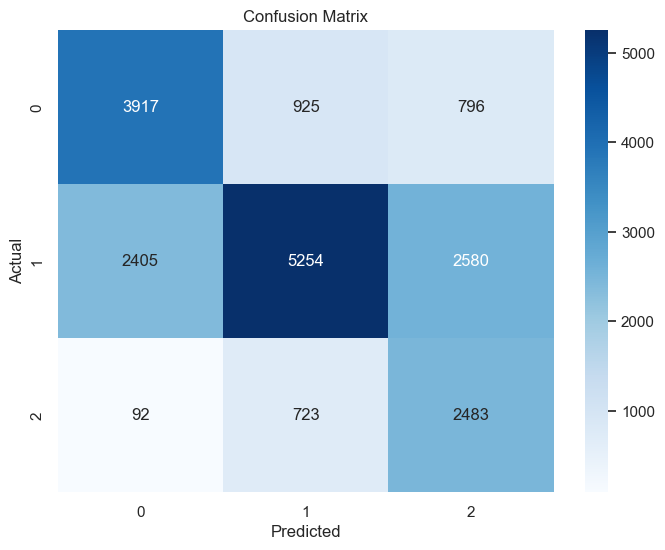

In [278]:
# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred_l)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [279]:
# Print the formatted classification report
class_report = classification_report(y_test, y_pred_l)
print("\tLogisticRegression Classification Report:\n\n", class_report)

	LogisticRegression Classification Report:

               precision    recall  f1-score   support

           0       0.61      0.69      0.65      5638
           1       0.76      0.51      0.61     10239
           2       0.42      0.75      0.54      3298

    accuracy                           0.61     19175
   macro avg       0.60      0.65      0.60     19175
weighted avg       0.66      0.61      0.61     19175



## 4. KNeighborsClassifier

In [280]:
# Create an instance of the kneighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30)

In [281]:
# Train the classifier
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [282]:
# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

In [283]:
# Check True Value vs Predicted Value on Test Set
classification_data = pd.DataFrame(zip(y_test, y_pred_knn),columns=['True Value','Predicted Value'])
classification_data

,True Value,Predicted Value
0,0,0
1,0,1
2,1,1
3,1,1
4,2,1
...,...,...
19170,0,0
19171,1,1
19172,0,0
19173,1,1


In [284]:
# Check the test score and train score for the model
test_score = knn_classifier.score(X_test, y_test)
train_score = knn_classifier.score(X_train, y_train)

print(f'The KNeighborsClassifier model test score is {test_score * 100:.2f}%')
print(f'The KNeighborsClassifier model train score is {train_score * 100:.2f}%')

The KNeighborsClassifier model test score is 75.68%
The KNeighborsClassifier model train score is 88.14%


> #### Evaluation


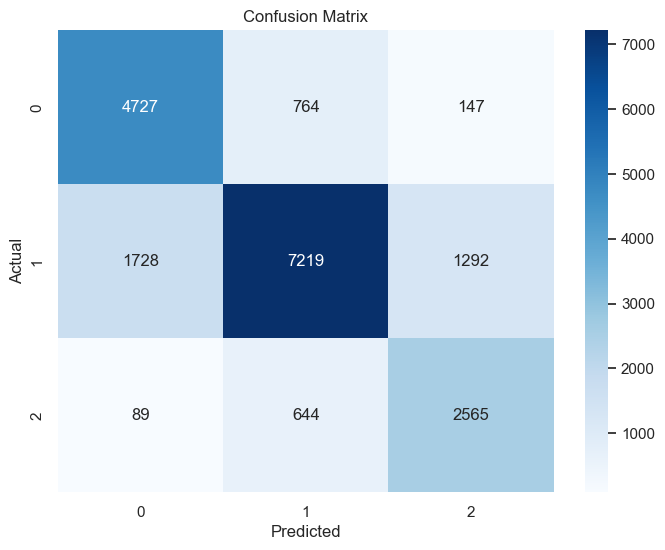

In [285]:
# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [286]:
# Print the formatted classification report
class_report = classification_report(y_test, y_pred_knn)
print("\tKNeighborsClassifier Classification Report:\n\n", class_report)

	KNeighborsClassifier Classification Report:

               precision    recall  f1-score   support

           0       0.72      0.84      0.78      5638
           1       0.84      0.71      0.77     10239
           2       0.64      0.78      0.70      3298

    accuracy                           0.76     19175
   macro avg       0.73      0.77      0.75     19175
weighted avg       0.77      0.76      0.76     19175



## Conclusion

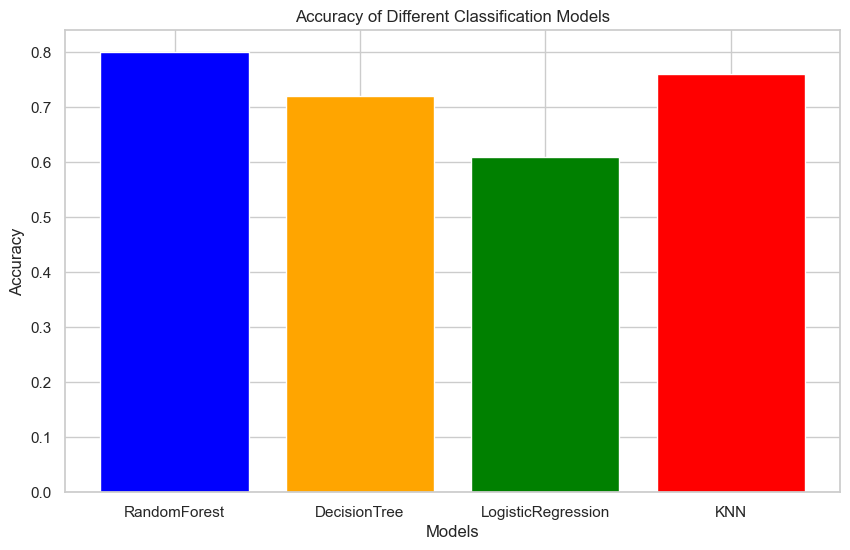

In [287]:
# Model names
models = ['RandomForest', 'DecisionTree', 'LogisticRegression', 'KNN']

# Accuracy scores for each model
accuracies = [0.80, 0.72, 0.61, 0.76]  

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])

# Add title and labels
plt.title('Accuracy of Different Classification Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Show plot
plt.show()

Based on the provided accuracy scores:

- RandomForest: 0.80
- DecisionTree: 0.72
- LogisticRegression: 0.61
- KNN: 0.76

the Random Forest model appears to be the best-performing model for this classification task, followed by the KNN model. The Decision Tree model also performed reasonably well, while the Logistic Regression model had the lowest accuracy among the models evaluated.


# V. Inference
After satisfactory evaluation results, the model can be used to make predictions, called inferences, on unlabeled examples.

In [288]:
def predict_credit_score():
    print("Credit Score Prediction: ")

    # Collect user input
    a = float(input("Annual Income: "))
    b = int(input("Number of Bank Accounts: "))
    c = int(input("Number of Credit cards: "))
    d = int(input("Interest rate: "))
    e = int(input("Number of Loans: "))
    f = int(input("Number of days delayed by the person: "))
    g = float(input("Number of delayed payments: "))
    h = int(input("Credit Mix (Bad: 0, Standard: 1, Good: 2): "))
    i = float(input("Outstanding Debt: "))
    j = float(input("Credit History Age: "))
    k = float(input("Monthly Balance: "))

    # Create a feature DataFrame with named columns
    feature_columns = ['annual_income', 'num_bank_accounts',
       'num_credit_cards', 'interest_rate', 'num_of_loans',
       'delay_from_due_date', 'num_of_delayed_payment', 'credit_mix',
       'outstanding_debt', 'credit_history_age', 'monthly_balance']

    features = pd.DataFrame(np.array([[a, b, c, d, e, f, g, h, i, j, k]]), columns=feature_columns)

    # Feature Scaling
    features = scaler.transform(features)
    
    # Make prediction (replace 'rf_classifier' with your actual model)
    predicted_score = rf_classifier.predict(features)
    
    print('\n-----------------------------------------------------------------------------------------------------------------\n')
    # Interpret the predicted result
    if predicted_score == 0:
        print("Predicted Credit Score: Poor")
    elif predicted_score == 1:
        print("Predicted Credit Score: Standard")
    elif predicted_score == 2:
        print("Predicted Credit Score: Good")
    else:
        print("Unexpected prediction result")

In [290]:
# Call the function to make a prediction
predict_credit_score()

Credit Score Prediction: 

-----------------------------------------------------------------------------------------------------------------

Predicted Credit Score: Standard


In [291]:
# Call the function to make a prediction
predict_credit_score()

Credit Score Prediction: 

-----------------------------------------------------------------------------------------------------------------

Predicted Credit Score: Good


In [293]:
# Call the function to make a prediction
predict_credit_score()

Credit Score Prediction: 

-----------------------------------------------------------------------------------------------------------------

Predicted Credit Score: Poor


# VI. Model Saving

In [294]:
joblib.dump(rf_classifier, '../models/best_model.pkl')

['../models/best_model.pkl']

In [295]:
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']